In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Data/Train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [4]:
df.describe()

target    target_min    target_max  target_variance   
count  30557.000000  30557.000000  30557.000000     3.055700e+04  \
mean      61.148045     29.025866    117.992234     7.983756e+03   
std       46.861309     33.119775    100.417713     4.863090e+04   
min        1.000000      1.000000      1.000000     0.000000e+00   
25%       25.000000      5.000000     60.000000     1.064920e+03   
50%       50.000000     15.000000     91.000000     2.395350e+03   
75%       80.000000     44.000000    155.000000     5.882550e+03   
max      815.000000    438.000000    999.000000     1.841490e+06   

       target_count  precipitable_water_entire_atmosphere   
count  30557.000000                          30557.000000  \
mean     125.831135                             15.302326   
std      146.581856                             10.688573   
min        2.000000                              0.420044   
25%       44.000000                              7.666667   
50%       72.000000                             12.200000   
75%      150.000000                             19.900000   
max     1552.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30557.000000                       30557.000000  \
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  ...   
count                 30557.000000                          30557.000000  ...  \
mean                      9.321342                              0.416886  ...   
std                       9.343226                              2.707990  ...   
min                     -34.647879                            -15.559646  ...   
25%                       3.123071                             -1.097864  ...   
50%                       8.478424                              0.222092  ...   
75%                      16.201563                              1.772925  ...   
max                      37.437921                             17.955124  ...   

       L3_SO2_sensor_zenith_angle  L3_SO2_solar_azimuth_angle   
count                23320.000000                23320.000000  \
mean                    35.590916                 -123.697777   
std                     18.955228                   71.916036   
min                      0.000000                 -179.880630   
25%                     19.451524                 -165.882624   
50%                     37.918838                 -156.637162   
75%                     52.270055                 -118.453598   
max                     66.111289                  179.776125   

       L3_SO2_solar_zenith_angle   
count               23320.000000  \
mean                   46.533951   
std                    14.594267   
min                     0.000000   
25%                    36.693094   
50%                    47.445010   
75%                    57.438181   
max                    79.631711   

       L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
count                                    5792.000000            5792.000000  \
mean                                      923.231949            1711.793613   
std                                       929.633988            1741.299304   
min                                         0.000000               0.000000   
25%                                         0.000000               0.000000   
50%                    

weather data. Humidity, temperature and wind speed, which can be used as inputs for your model.

For each pollutant, we queried the offline Level 3 (L3) datasets available in Google Earth Engine 



In [5]:
df.isnull().sum()>0

Place_ID X Date                 False
Date                            False
Place_ID                        False
target                          False
target_min                      False
                                ...  
L3_CH4_aerosol_optical_depth     True
L3_CH4_sensor_azimuth_angle      True
L3_CH4_sensor_zenith_angle       True
L3_CH4_solar_azimuth_angle       True
L3_CH4_solar_zenith_angle        True
Length: 82, dtype: bool

In [6]:
df.loc[:,(df.isnull().sum()>0) & (df.dtypes!="object")].columns

Index(['L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
       'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_nu

In [7]:
df.loc[:,(df.isnull().sum()==0) & (df.dtypes!="object")].shape

(30557, 11)

In [8]:
df.loc[:,df.columns.str.contains("cloud_fraction")]

L3_NO2_cloud_fraction  L3_O3_cloud_fraction  L3_HCHO_cloud_fraction   
0                   0.006507              0.000000                0.000000  \
1                   0.018360              0.059433                0.059433   
2                   0.015904              0.082063                0.082063   
3                   0.055765              0.121261                0.121261   
4                   0.028530              0.037919                0.037919   
...                      ...                   ...                     ...   
30552               0.001107              0.001310                0.001310   
30553               0.004726              0.007644                0.007644   
30554               0.026249              0.025447                0.025447   
30555               0.144318              0.173391                0.103292   
30556               0.030848                   NaN                     NaN   

       L3_CLOUD_cloud_fraction  L3_SO2_cloud_fraction  
0                     0.000000               0.000000  
1                     0.059358               0.059433  
2                     0.082247               0.082063  
3                     0.121555               0.121261  
4                     0.037008               0.037919  
...                        ...                    ...  
30552                 0.001238               0.001310  
30553                 0.007750               0.007644  
30554                 0.026480               0.025447  
30555                 0.175418               0.153445  
30556                      NaN                    NaN  

[30557 rows x 5 columns]

<Axes: >

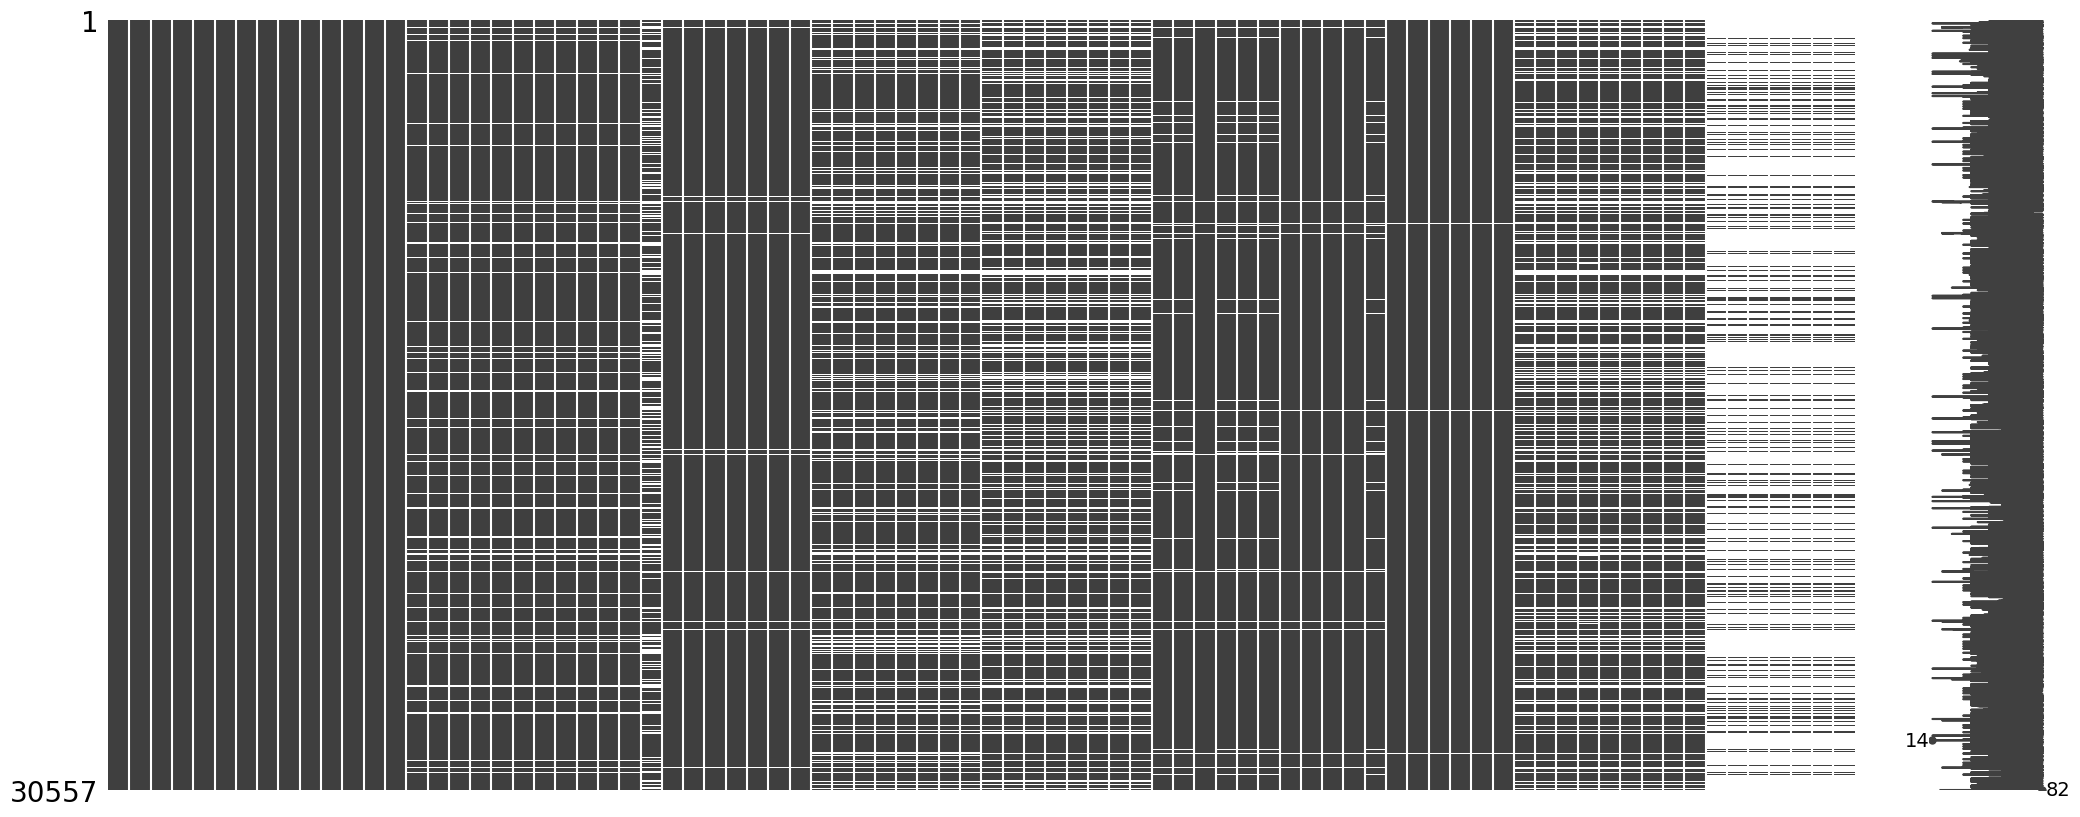

In [9]:
msno.matrix(df)

In [10]:
df.shape

(30557, 82)

<Axes: >

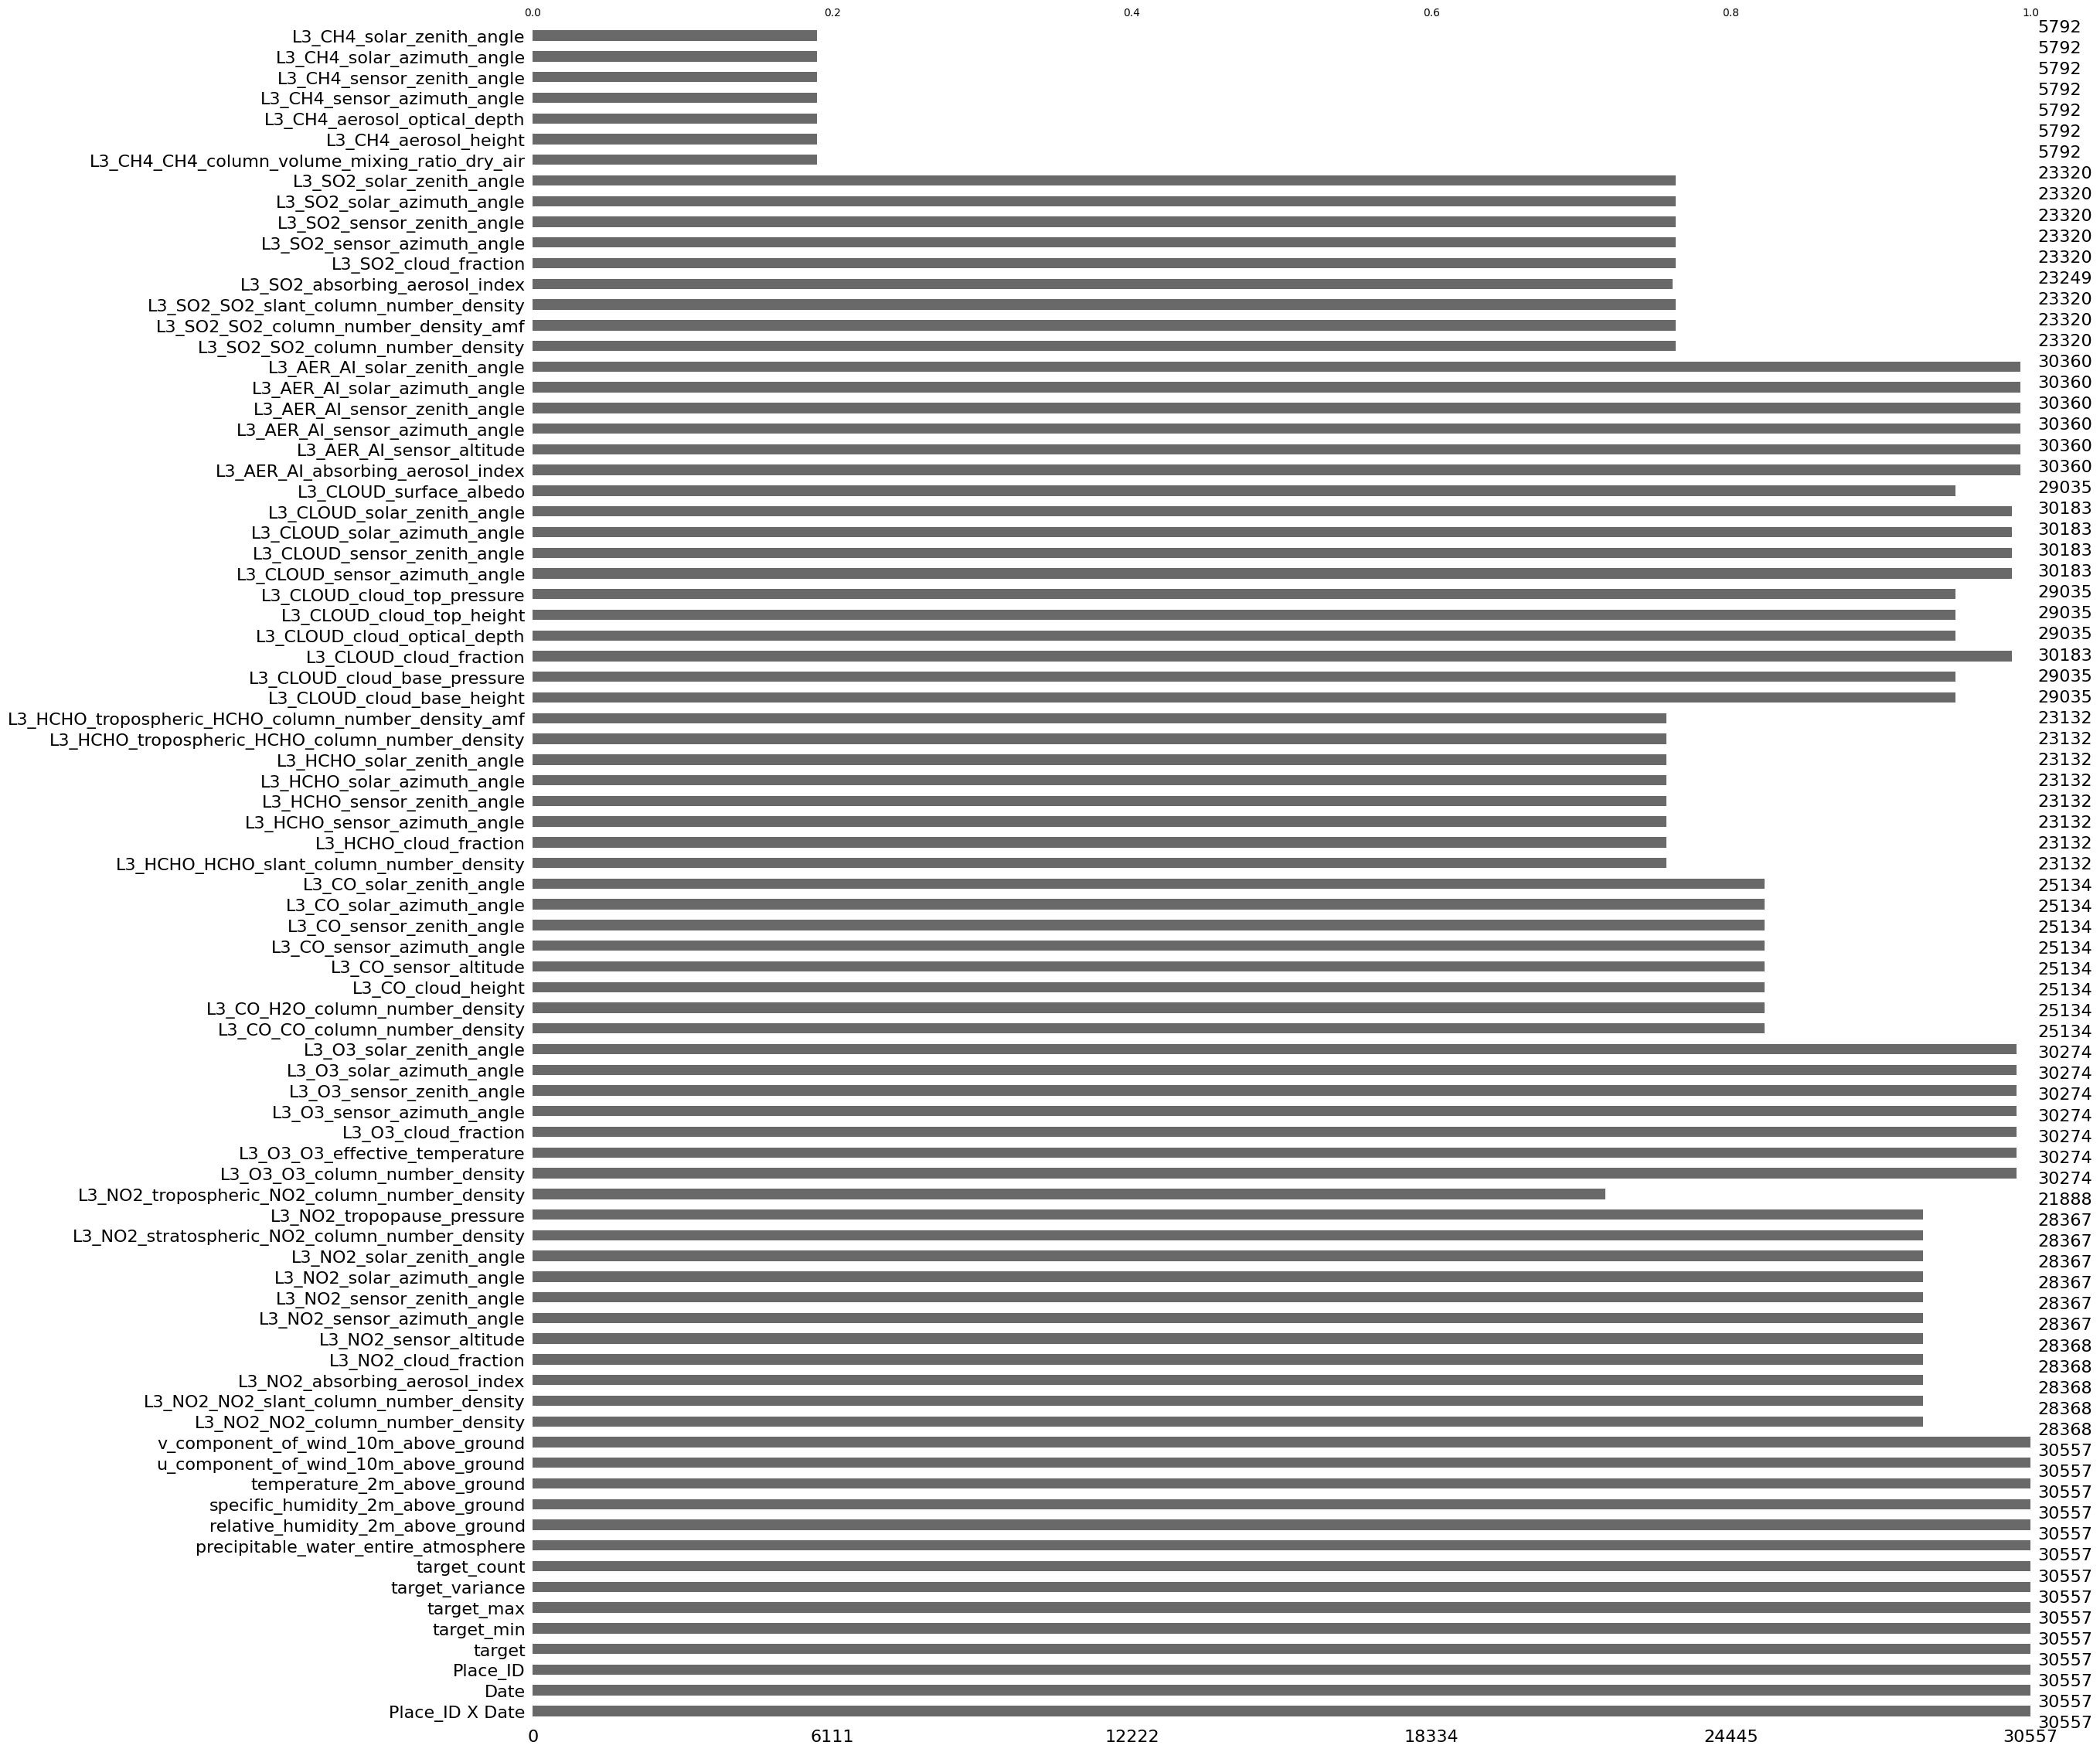

In [11]:
msno.bar(df)

In [12]:
df.loc[:,df.dtypes=="object"].columns

Index(['Place_ID X Date', 'Date', 'Place_ID'], dtype='object')

In [13]:
df["Place_ID X Date"]

0        010Q650 X 2020-01-02
1        010Q650 X 2020-01-03
2        010Q650 X 2020-01-04
3        010Q650 X 2020-01-05
4        010Q650 X 2020-01-06
                 ...         
30552    YWSFY6Q X 2020-03-15
30553    YWSFY6Q X 2020-03-16
30554    YWSFY6Q X 2020-03-17
30555    YWSFY6Q X 2020-03-18
30556    YWSFY6Q X 2020-03-19
Name: Place_ID X Date, Length: 30557, dtype: object

In [14]:
df["Date"]

0        2020-01-02
1        2020-01-03
2        2020-01-04
3        2020-01-05
4        2020-01-06
            ...    
30552    2020-03-15
30553    2020-03-16
30554    2020-03-17
30555    2020-03-18
30556    2020-03-19
Name: Date, Length: 30557, dtype: object

In [15]:
df["Place_ID"]

0        010Q650
1        010Q650
2        010Q650
3        010Q650
4        010Q650
          ...   
30552    YWSFY6Q
30553    YWSFY6Q
30554    YWSFY6Q
30555    YWSFY6Q
30556    YWSFY6Q
Name: Place_ID, Length: 30557, dtype: object

In [16]:
df.isna().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

msno.heatmap(df)

In [17]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [18]:
corr_cloud_fraction=df.loc[:,df.columns.str.contains("cloud_fraction")].corr()
corr_solar_azimuth=df.loc[:,(df.columns.str.contains("solar_azimuth"))&(~df.columns.str.contains("CH4")) ].corr()
corr_solar_zenith=df.loc[:,(df.columns.str.contains("solar_zenith"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_azimuth=df.loc[:,(df.columns.str.contains("sensor_azimuth"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_zenith=df.loc[:,(df.columns.str.contains("sensor_zenith"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_altitude=df.loc[:,(df.columns.str.contains("sensor_altitude"))&(~df.columns.str.contains("CH4")) ].corr()
corr_absorbing_aerosol_index= df.loc[:,(df.columns.str.contains("absorbing_aerosol_index"))&(~df.columns.str.contains("CH4")) ].corr()

In [19]:

df_drop_angles=df.drop(df.loc[:,(df.columns.str.contains("solar_zenith_angle"))&(~df.columns.str.contains("AER_AI_solar_zenith_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("solar_azimuth_angle"))&(~df.columns.str.contains("AER_AI_solar_azimuth_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("sensor_azimuth_angle"))&(~df.columns.str.contains("AER_AI_sensor_azimuth_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("sensor_zenith_angle"))&(~df.columns.str.contains("AER_AI_sensor_zenith_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("CH4"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("cloud_fraction"))&(~df_drop_angles.columns.str.contains("Cloud_cloud_fraction"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("stratospheric"))],axis=1)
df_drop_angles.shape

(30557, 45)

<Axes: >

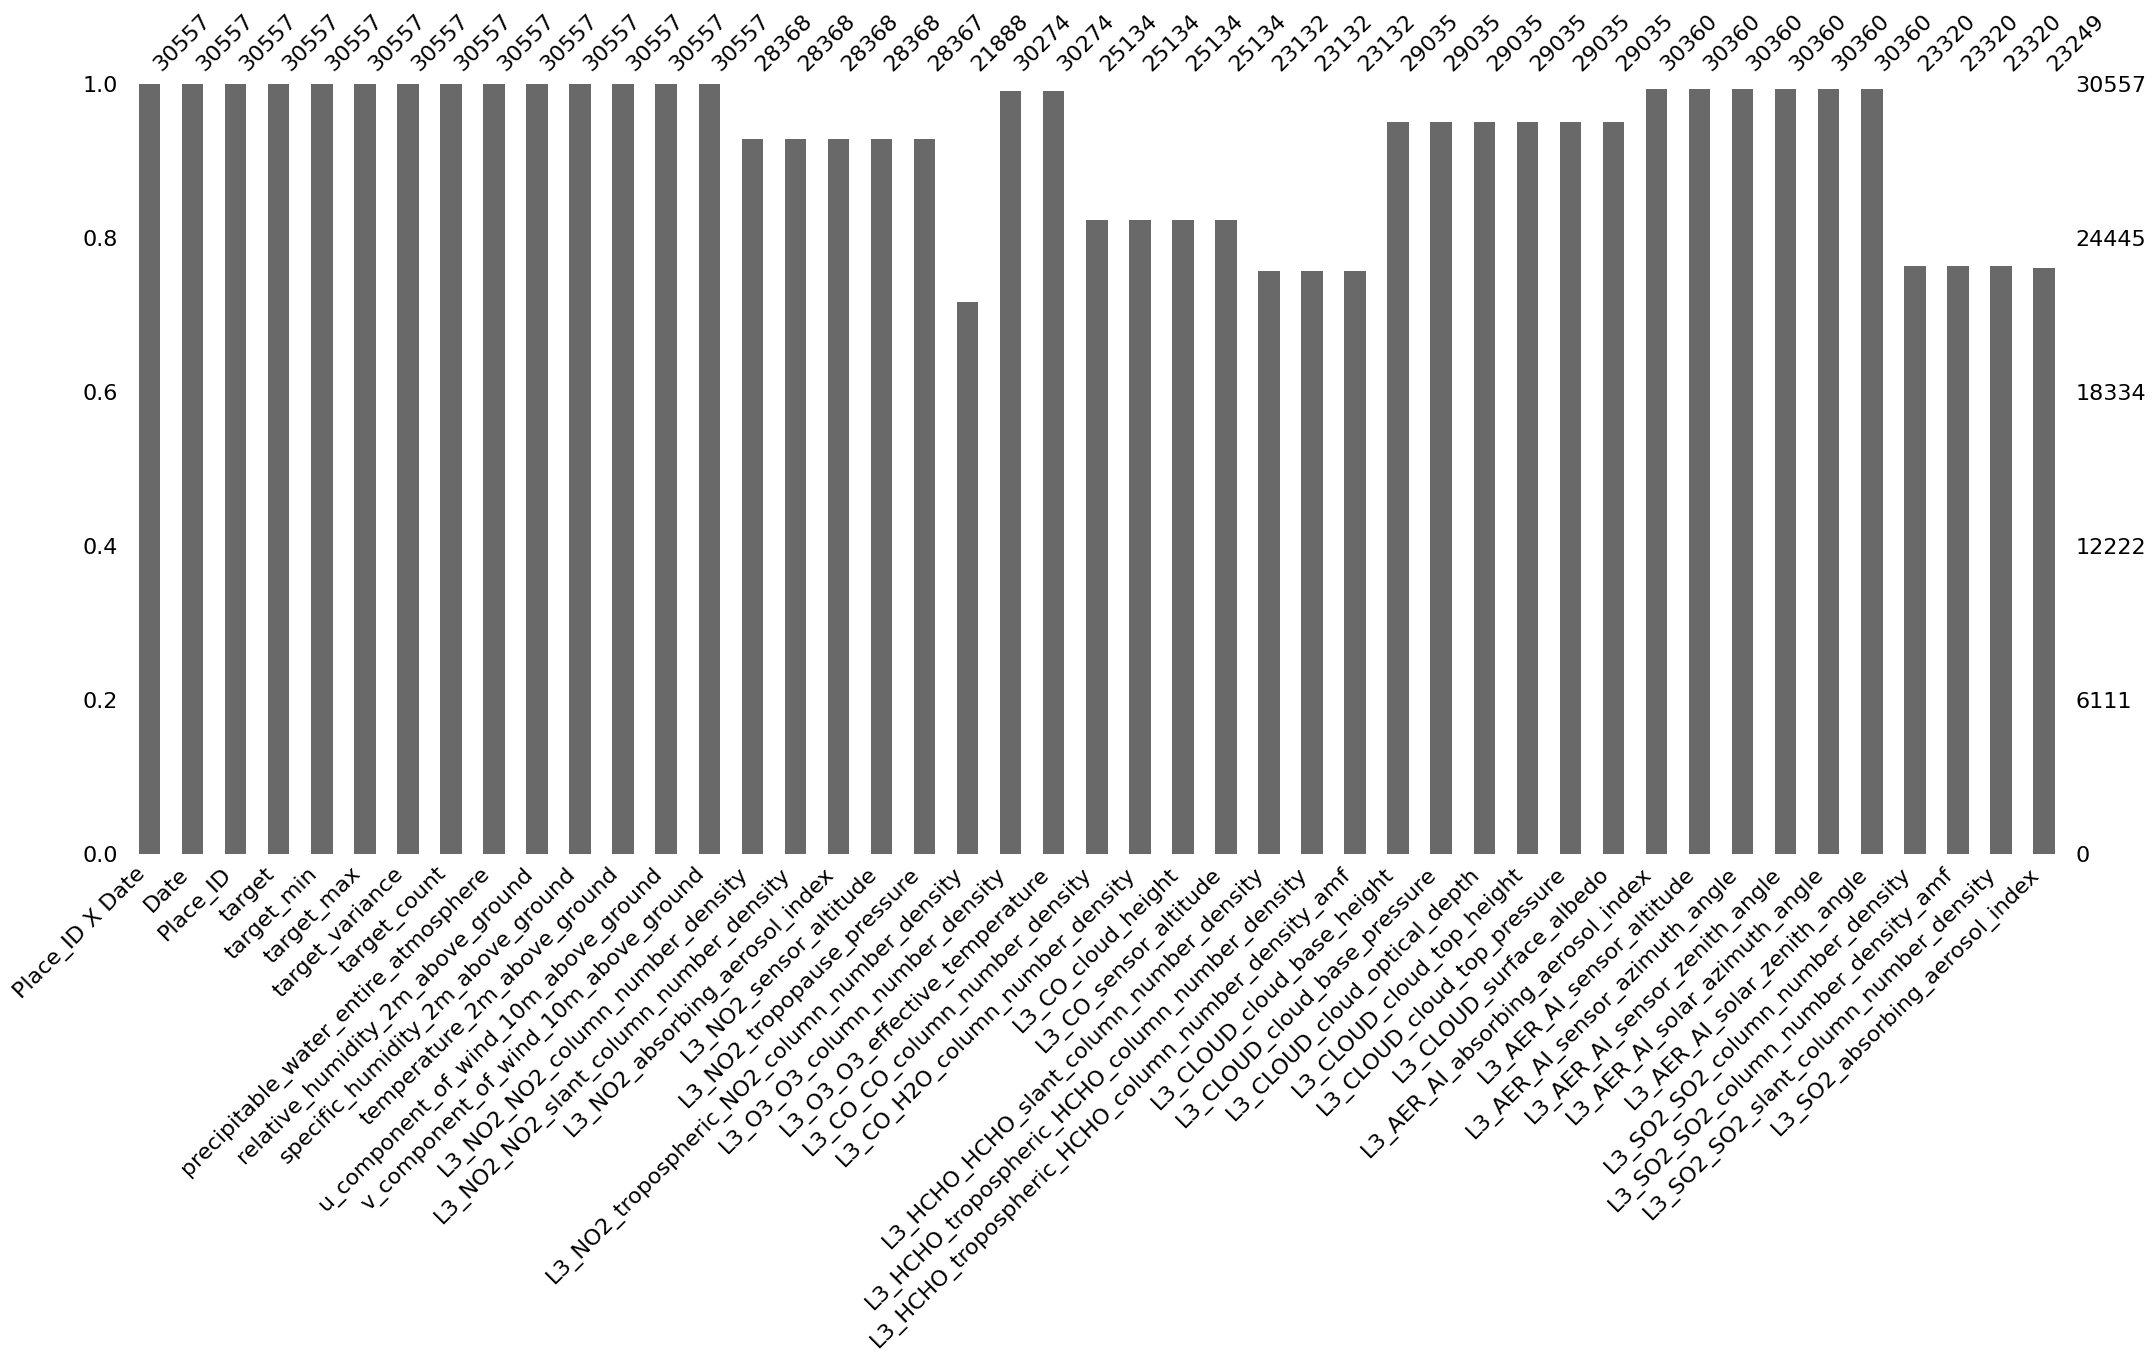

In [20]:
msno.bar(df_drop_angles)

In [21]:
#sns.pairplot(df_drop.sample(2000),corner=True,diag_kind='kde')

sensor altitude NO2 seams bullshit it vary betwen ~0.7 and 0 (sample sice of plot above is only 2000)


In [22]:
df_drop_angles.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_sensor_altitude',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density',
       'L3_CO_cloud_height', 'L3_CO_sensor_altitude',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_

In [23]:
df_drop_angles.describe()

target    target_min    target_max  target_variance   
count  30557.000000  30557.000000  30557.000000     3.055700e+04  \
mean      61.148045     29.025866    117.992234     7.983756e+03   
std       46.861309     33.119775    100.417713     4.863090e+04   
min        1.000000      1.000000      1.000000     0.000000e+00   
25%       25.000000      5.000000     60.000000     1.064920e+03   
50%       50.000000     15.000000     91.000000     2.395350e+03   
75%       80.000000     44.000000    155.000000     5.882550e+03   
max      815.000000    438.000000    999.000000     1.841490e+06   

       target_count  precipitable_water_entire_atmosphere   
count  30557.000000                          30557.000000  \
mean     125.831135                             15.302326   
std      146.581856                             10.688573   
min        2.000000                              0.420044   
25%       44.000000                              7.666667   
50%       72.000000                             12.200000   
75%      150.000000                             19.900000   
max     1552.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30557.000000                       30557.000000  \
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  ...   
count                 30557.000000                          30557.000000  ...  \
mean                      9.321342                              0.416886  ...   
std                       9.343226                              2.707990  ...   
min                     -34.647879                            -15.559646  ...   
25%                       3.123071                             -1.097864  ...   
50%                       8.478424                              0.222092  ...   
75%                      16.201563                              1.772925  ...   
max                      37.437921                             17.955124  ...   

       L3_AER_AI_absorbing_aerosol_index  L3_AER_AI_sensor_altitude   
count                       30360.000000               30360.000000  \
mean                           -1.161213              832553.776969   
std                             0.538363                2925.955780   
min                            -3.967332              828758.030458   
25%                            -1.517307              830410.133360   
50%                            -1.179243              832052.440760   
75%                            -0.817034              834108.283155   
max                             4.824804              844493.897695   

       L3_AER_AI_sensor_azimuth_angle  L3_AER_AI_sensor_zenith_angle   
count                    30360.000000                   30360.000000  \
mean                       -11.152614                      36.667009   
std                         70.810967                      18.368273   
min                       -112.086780                       0.418773   
25%                        -96.712220                      21.086891   
50%                        -14.530955                      40.629677   
75%                         69.286958                      52.285927   
max                         77.709979                      66.504266   

       L3_AER_AI_solar_azimuth_angle  L3_AER_AI_solar_zenith_angle   
count                   30360.000000             

<Axes: >

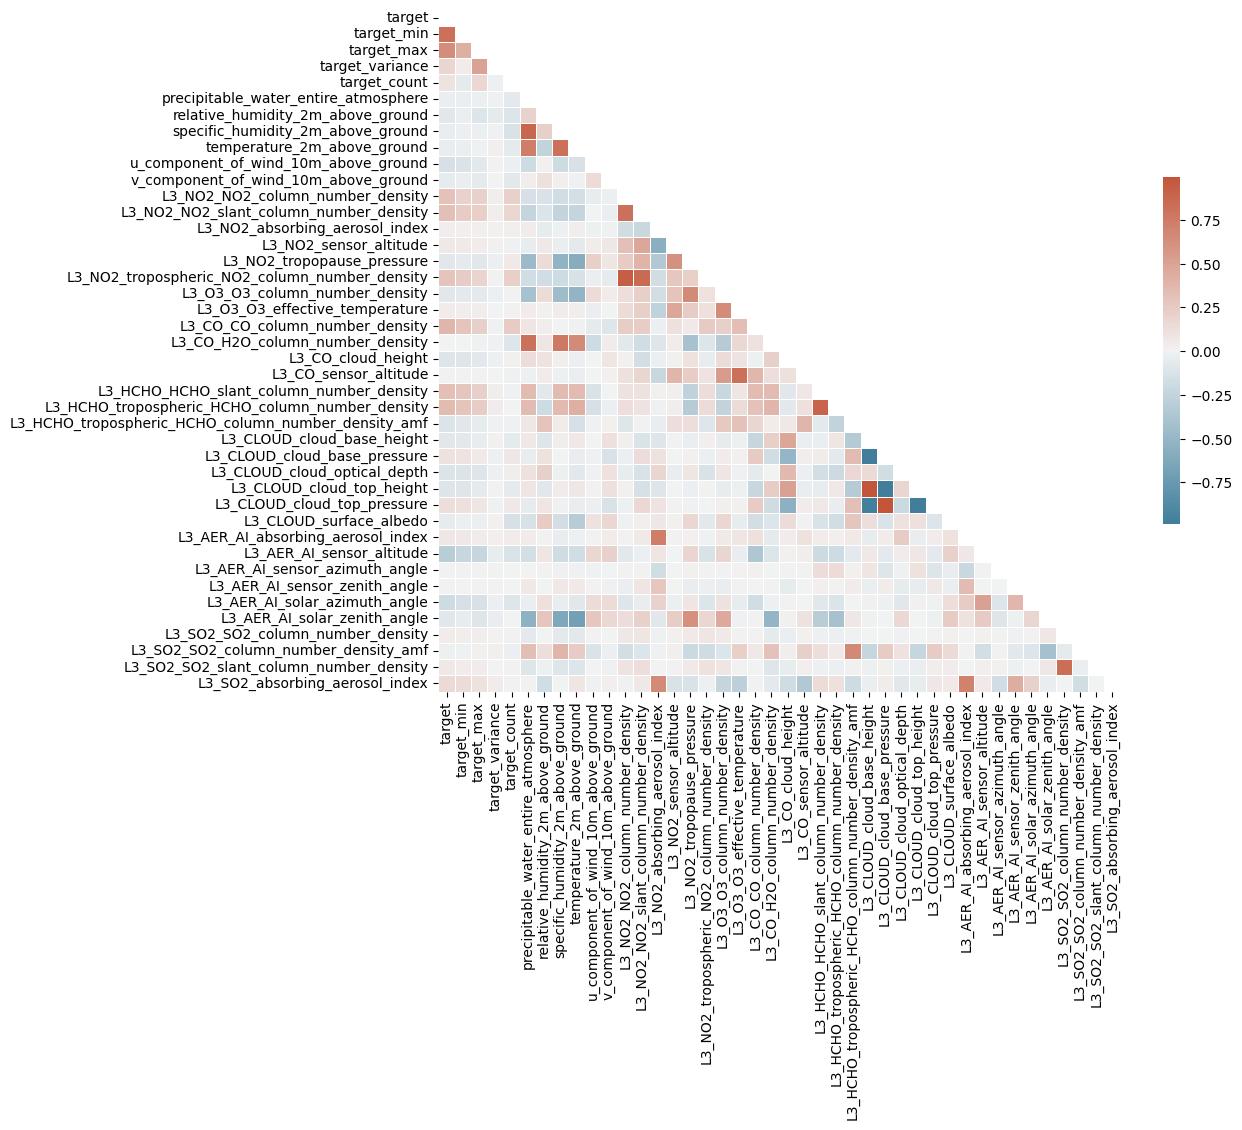

In [24]:
corr_drop=df_drop_angles.drop(["Date","Place_ID","Place_ID X Date"],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_drop, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_drop, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

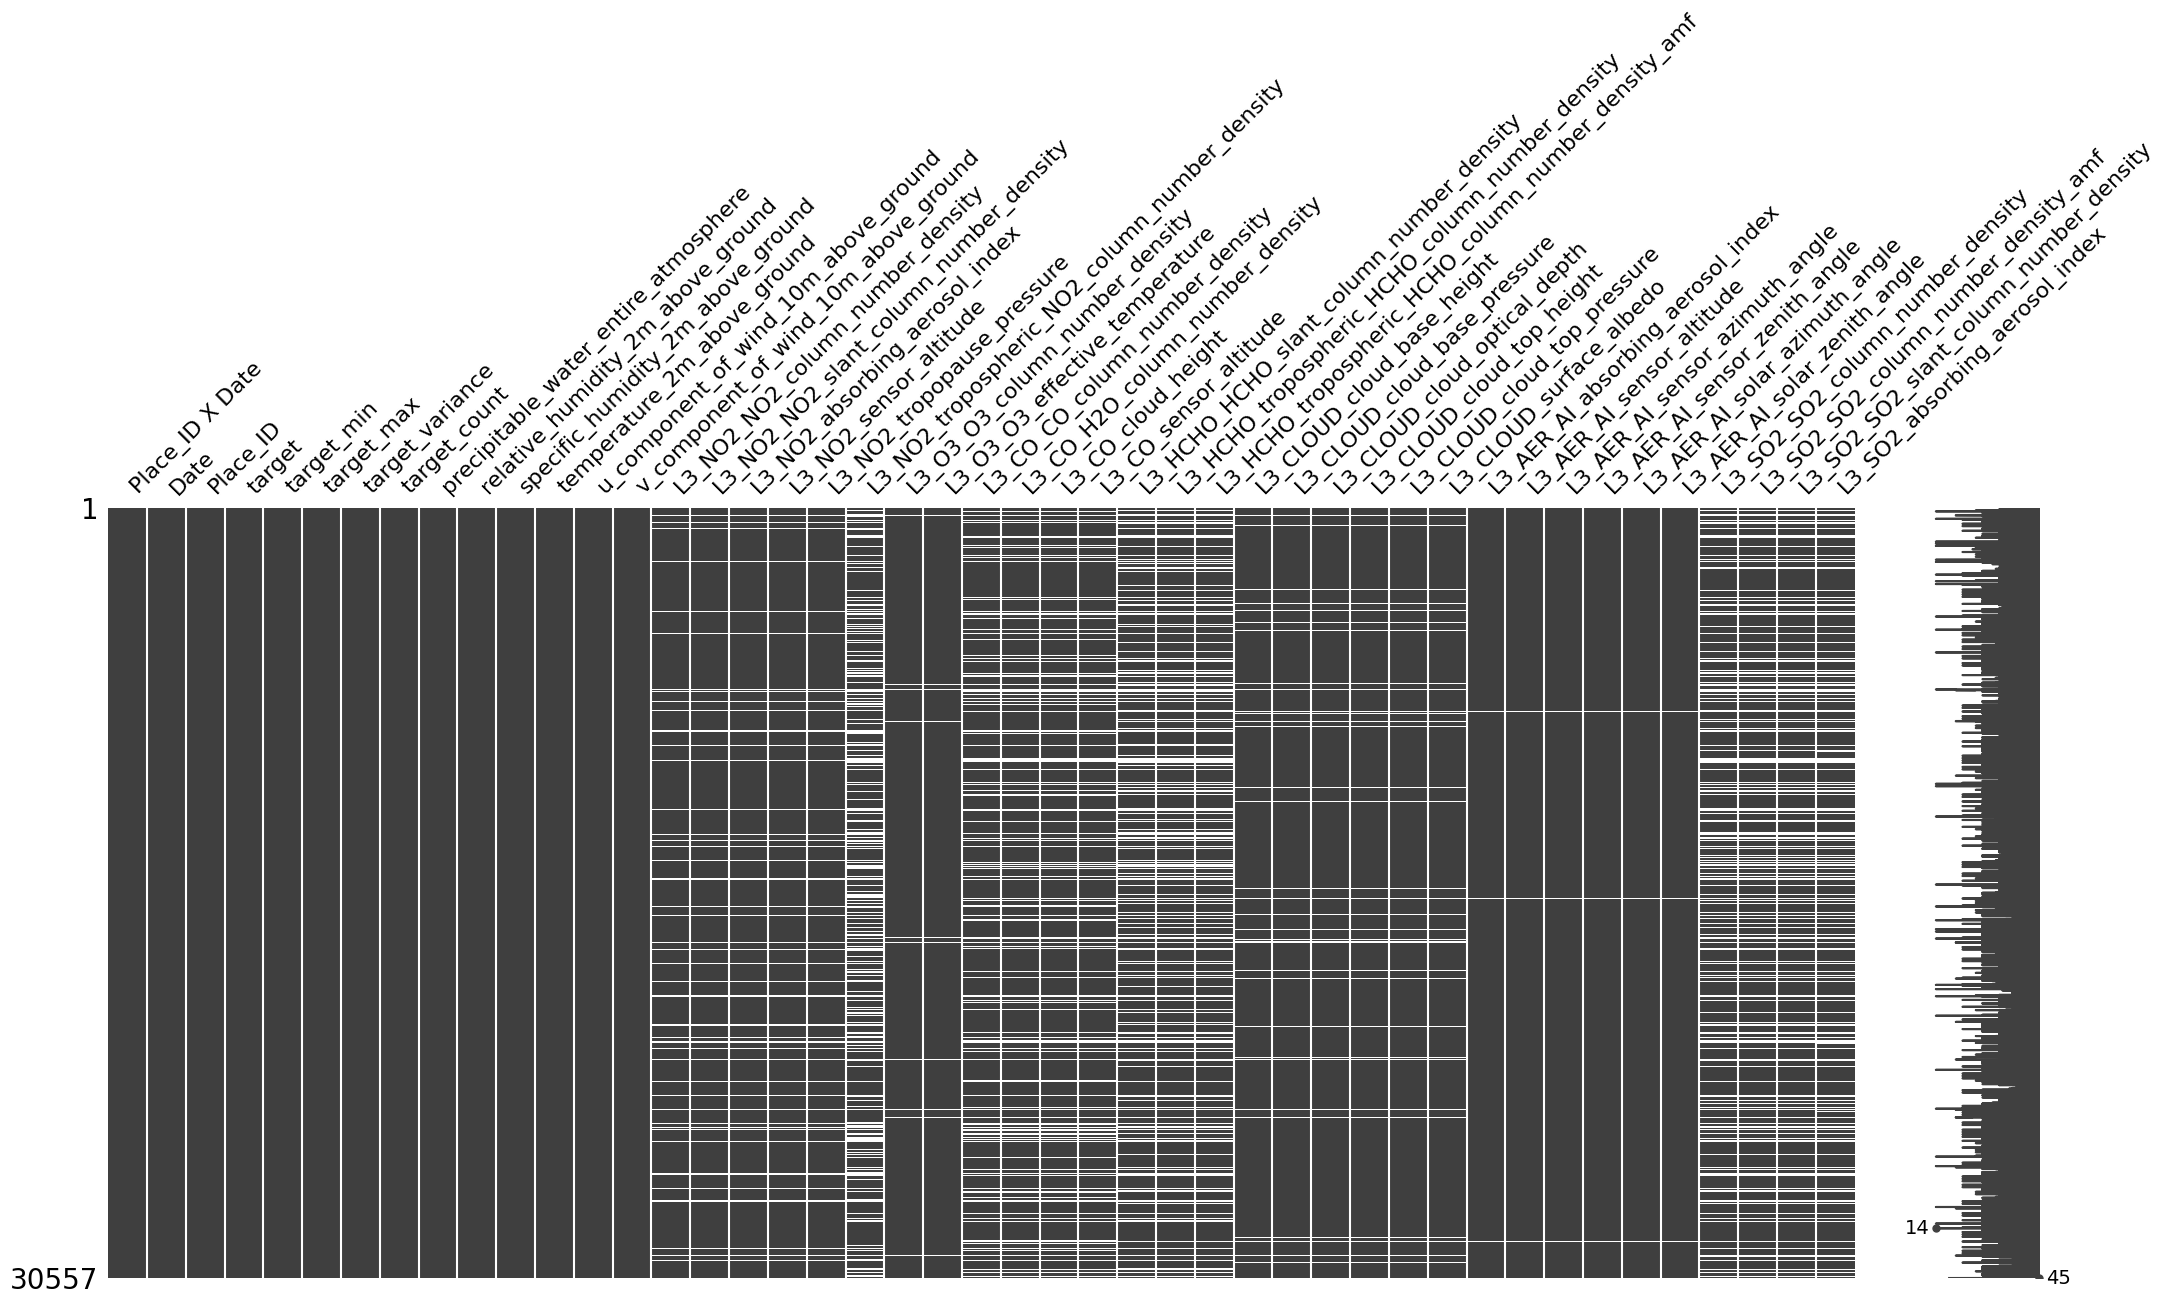

In [25]:
msno.matrix(df_drop_angles)

<Axes: >

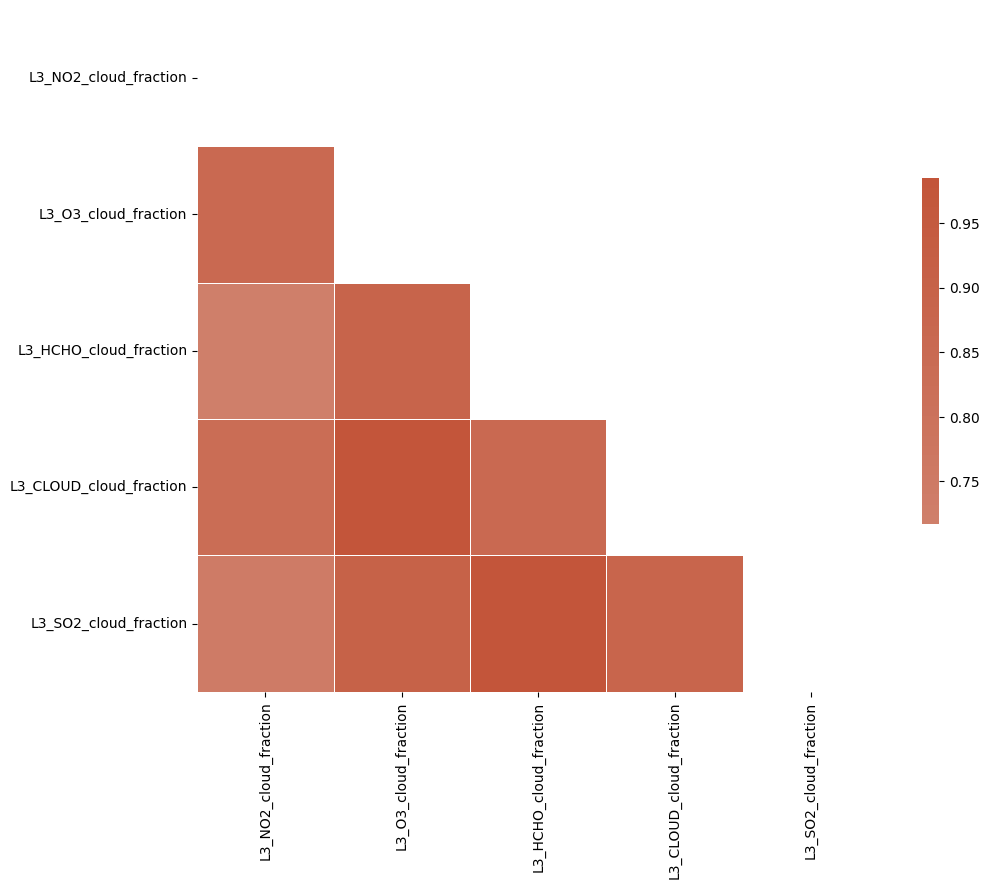

In [26]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cloud_fraction, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cloud_fraction, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

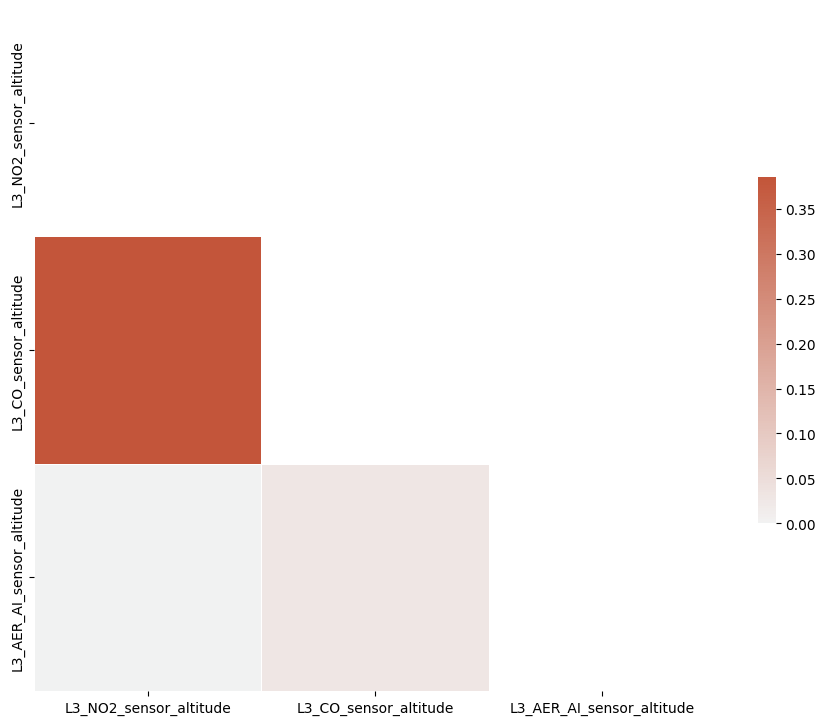

In [27]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_sensor_altitude, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_sensor_altitude, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

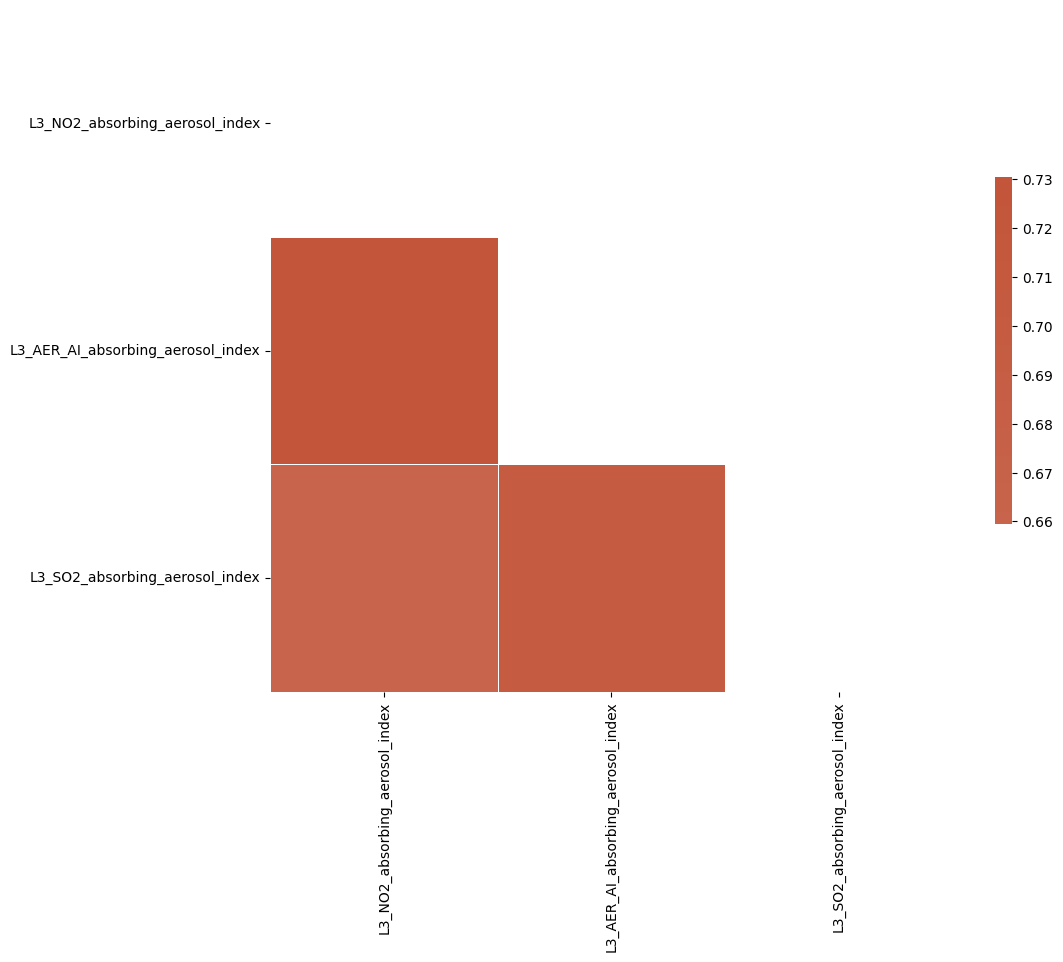

In [28]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_absorbing_aerosol_index, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_absorbing_aerosol_index, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

dummys
datime
drop 4 y maxes?

test train split

 linear regerssion


In [108]:
import pickle
rseed=42

In [29]:

df_no_na=df_drop_angles.dropna()
X=df_no_na.drop(df_no_na.loc[:,(df_no_na.columns.str.contains("target"))],axis=1)
x=df_no_na.drop("Place_ID X Date",axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
X=pd.get_dummies(X,columns=["Place_ID"])
X=X.drop("Place_ID X Date",axis=1)

y=df_no_na["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)

y_no_out.max()

410.0

In [30]:
y.shape

(18219,)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)


23.48401723250742

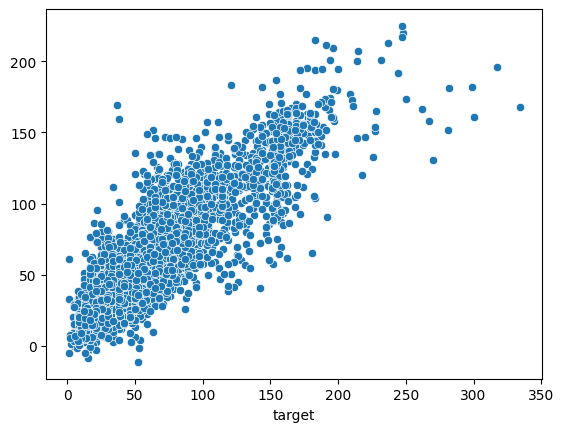

In [ ]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

y_pred=linear_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

pickle.dump(liner_model, open("linearmodl_with_place_dummies", 'wb'))



In [191]:
X=[]
y=[]
df_no_na=df_drop_angles.dropna()
X=df_no_na.drop(df_no_na.loc[:,(df_no_na.columns.str.contains("target"))],axis=1)
X=X.drop("Place_ID X Date",axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])
X=X.drop("Place_ID",axis=1)

y=df_no_na["target"]
y_no_out_noPlace=y.drop(y.nlargest(4).index)
x_no_out_noPlace=X.drop(y.nlargest(4).index)


In [192]:
X_train_np,X_test_np, y_train_np, y_test_np=train_test_split(x_no_out_noPlace,y_no_out_noPlace,test_size=0.2,random_state=rseed)

35.265836116516134

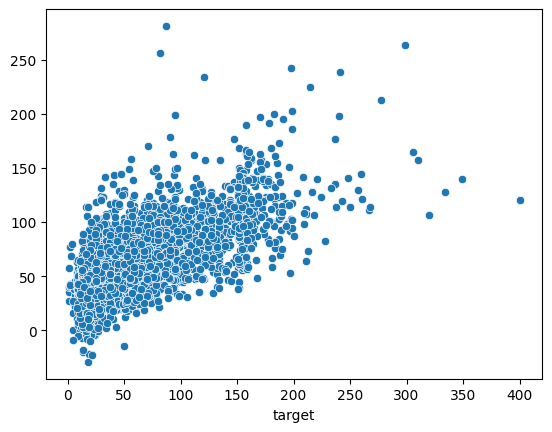

In [193]:
linear_model_np=LinearRegression()
linear_model_np.fit(X_train_np,y_train_np)

y_pred_np=linear_model_np.predict(X_test_np)

sns.scatterplot(x=y_test_np,y=y_pred_np)
sqrt(mean_squared_error(y_test_np,y_pred_np))

In [104]:
pickle.dump(linear_model_np, open("linearmodl_no_place", 'wb'))

26.61443106546521

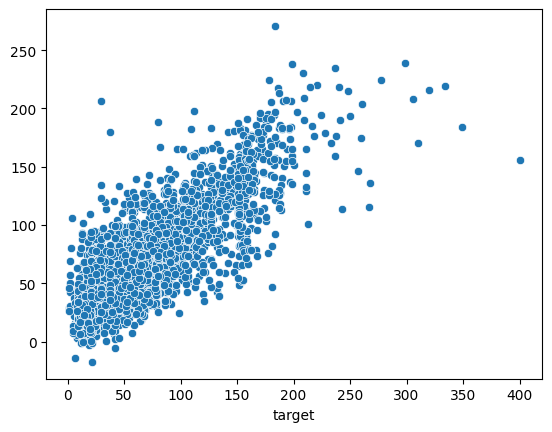

In [194]:

boost_np=XGBRegressor(eval_metric="rmse")
boost_np.fit(X_train_np,y_train_np)

y_pred_np=boost_np.predict(X_test_np)

sns.scatterplot(x=y_test_np,y=y_pred_np)
sqrt(mean_squared_error(y_test_np,y_pred_np))

23.555796525188526

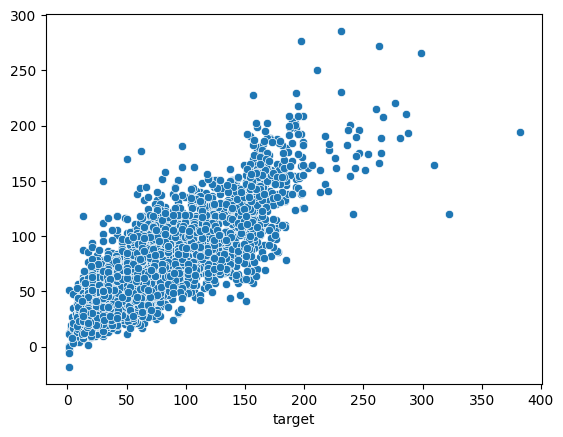

In [77]:
from xgboost import XGBRegressor

boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(boost, open("xgboost_with_place_dummies-01", 'wb'))

In [78]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [79]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:57:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:57:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:57:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib

[CV] END booster=gblinear, colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  19.3s
[CV] END booster=gblinear, colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  19.8s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:57:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:57:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  20.4s
[CV] END booster=gblinear, colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  20.4s
[CV] END booster=gblinear, colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  20.5s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=15, min_child_weight=25, n_estimators=400, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  28.1s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=15, min_child_weight=25, n_estimators=400, objective=reg:squarederror, reg_alpha=1, reg_lambda=5;

/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:58:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=5; total time=  43.2s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:58:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=5; total time=  42.2s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:58:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  39.8s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:59:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  40.8s
[CV] END booster=gblinear, colsample_bytree=0.9, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  40.3s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:59:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:59:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  23.4s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:59:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  37.5s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:00:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=500, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  39.3s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  24.6s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:00:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  25.9s
[CV] END booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  26.2s
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time= 2.4min
[CV] END booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  27.8s
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; tot

/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:00:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time= 2.6min


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:01:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time= 2.6min


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:01:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=15, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=5; total time=  39.9s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:01:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=5; total time= 1.1min


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:01:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=5; total time=  58.4s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=5; total time= 1.1min
[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=15, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=5; total time=  37.7s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=5; total time=  56.8s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=5;

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [1, 2, 3],
                                        'learning_rate': [0.1],
                                        'max_depth': [7, 10, 15, 20],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [300, 400, 500, 600],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 0.2, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=2)

In [80]:
rs.best_params_

{'reg_lambda': 5,
 'reg_alpha': 0.2,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 20,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 1,
 'booster': 'gbtree'}

21.068739770567515

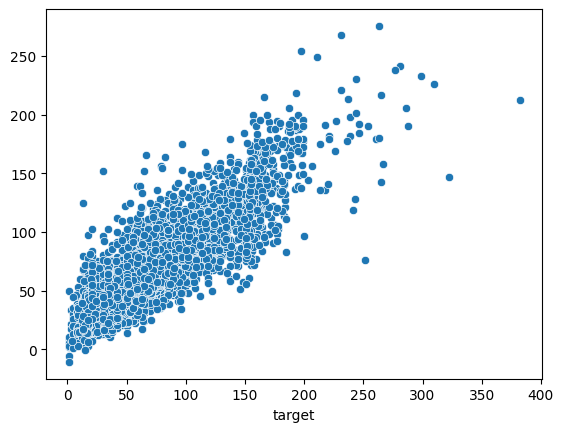

In [81]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(best_model, open("xgboost_with_place_dummies-02", 'wb'))

In [82]:

parameters = {'max_depth': [9,10,11,12],
              'min_child_weight': [8,9,10,11,12],
              'n_estimators': [600,700,900],}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_child_weight=10, n_estimators=900; total time= 1.6min
[CV] END max_depth=10, min_child_weight=10, n_estimators=900; total time= 1.7min
[CV] END max_depth=10, min_child_weight=10, n_estimators=900; total time= 1.8min
[CV] END .max_depth=11, min_child_weight=8, n_estimators=900; total time= 2.1min
[CV] END .max_depth=11, min_child_weight=8, n_estimators=900; total time= 2.1min
[CV] END .max_depth=11, min_child_weight=8, n_estimators=900; total time= 2.2min
[CV] END .max_depth=11, min_child_weight=8, n_estimators=900; total time= 2.2min
[CV] END .max_depth=11, min_child_weight=8, n_estimators=900; total time= 2.3min
[CV] END max_depth=10, min_child_weight=12, n_estimators=600; total time= 1.1min
[CV] END max_depth=10, min_child_weight=12, n_estimators=600; total time=  59.1s
[CV] END max_depth=10, min_child_weight=12, n_estimators=600; total time= 1.0min
[CV] END max_depth=10, min_child_weight=12, n_es

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=2,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=Non...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None, min_child_weight=20,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=500,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [9, 10, 11, 12],
                                        'min_child_weight': [8, 9, 10, 11, 12],
                                        'n_estimators': [600, 700, 900]},
                   verbose=2)

20.353366261800776

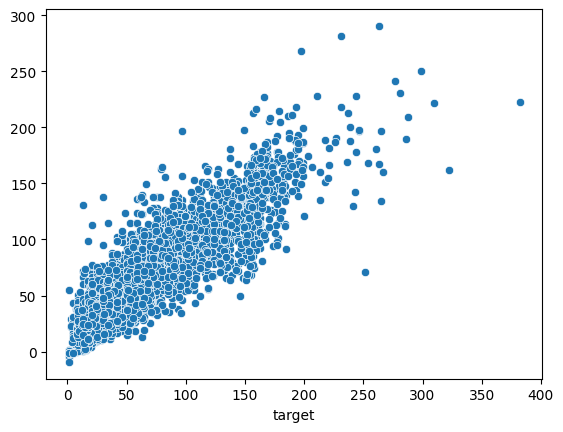

In [83]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(best_model, open("xgboost_with_place_dummies-03", 'wb'))

In [84]:
rs.best_params_

{'n_estimators': 900, 'min_child_weight': 12, 'max_depth': 9}

In [85]:
parameters = {'max_depth': [7,8,9,10],
              'min_child_weight': [11,12,13,14],
              'n_estimators': [900,1000,1100],}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=8, min_child_weight=12, n_estimators=900; total time= 1.1min
[CV] END .max_depth=8, min_child_weight=12, n_estimators=900; total time= 1.1min
[CV] END .max_depth=8, min_child_weight=12, n_estimators=900; total time= 1.1min
[CV] END .max_depth=8, min_child_weight=12, n_estimators=900; total time= 1.1min
[CV] END .max_depth=8, min_child_weight=12, n_estimators=900; total time= 1.1min
[CV] END max_depth=10, min_child_weight=14, n_estimators=1100; total time= 1.9min
[CV] END max_depth=10, min_child_weight=14, n_estimators=1100; total time= 1.9min
[CV] END max_depth=10, min_child_weight=14, n_estimators=1100; total time= 2.0min
[CV] END .max_depth=9, min_child_weight=12, n_estimators=900; total time= 1.3min
[CV] END .max_depth=9, min_child_weight=12, n_estimators=900; total time= 1.2min
[CV] END .max_depth=9, min_child_weight=12, n_estimators=900; total time= 1.3min
[CV] END max_depth=10, min_child_weight=14, n

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=2,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=Non...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=9,
                                          max_leaves=None, min_child_weight=12,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=900,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'min_child_weight': [11, 12, 13, 14],
                                        'n_estimators': [900, 1000, 1100]},
                   verbose=2)

20.20645828659954

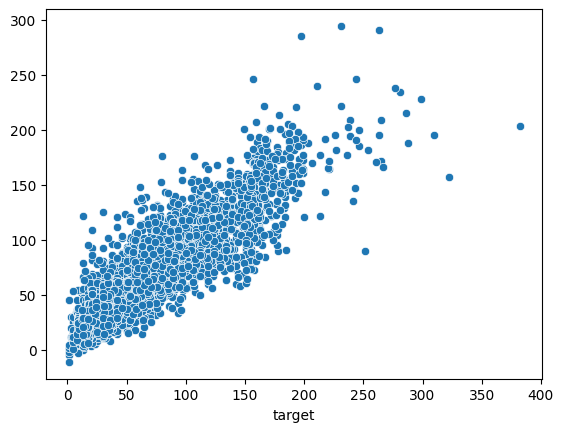

In [86]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(best_model, open("xgboost_with_place_dummies-04", 'wb'))

---
### Full Data

In [87]:
X=[]
y=[]


X=df.drop(df.loc[:,(df.columns.str.contains("target"))],axis=1)
x=df.drop("Place_ID X Date",axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
X=pd.get_dummies(X,columns=["Place_ID"])
X=X.drop("Place_ID X Date",axis=1)

y=df["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]

In [88]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)

24.61376988297302

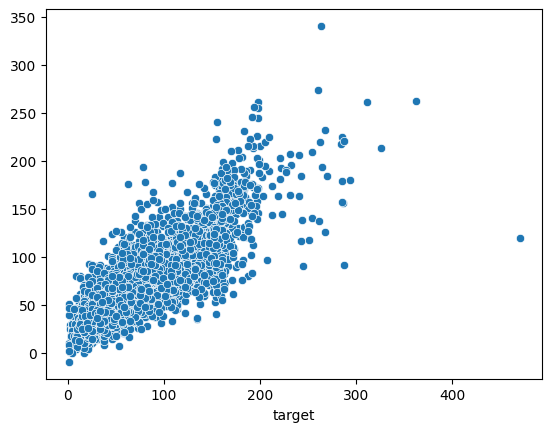

In [89]:
boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(boost, open("xgboost_with_place_dummies_all_features-01", 'wb'))

In [90]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,8,9,10,11],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [900,1000,1100],
              "reg_alpha"   : [0.5,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=1100, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 1.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=1100, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 1.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=1100, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 1.0min
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=20, n_estimators=900, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  44.6s
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=1100, objective=

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [2, 3], 'learning_rate': [0.1],
                                        'max_depth': [7, 8, 9, 10, 11],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [900, 1000, 1100],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=2)

20.959290101910728

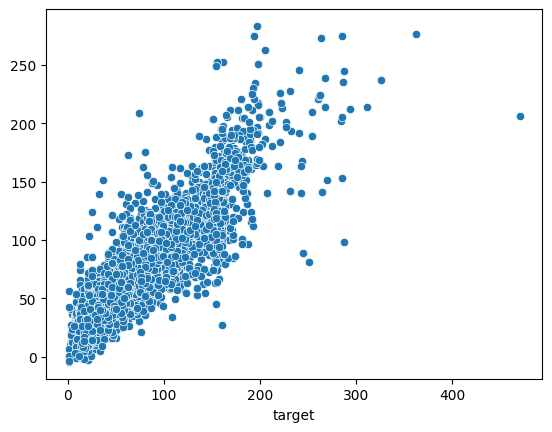

In [91]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)

sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(best_model, open("xgboost_with_place_dummies_all_features-02", 'wb'))

In [92]:
rs.best_params_

{'reg_lambda': 3,
 'reg_alpha': 1,
 'objective': 'reg:squarederror',
 'n_estimators': 1100,
 'min_child_weight': 20,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 3,
 'colsample_bytree': 0.8,
 'booster': 'gbtree'}

In [93]:
parameters = { 'max_depth': [5,6,7,8,9],
              'min_child_weight': [13,14,15,16],
              'n_estimators': [1050,1100,1150],
              "reg_lambda"  : [1.5,2,3.5,4]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=7, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time=  57.6s
[CV] END max_depth=7, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time=  57.8s
[CV] END max_depth=7, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time=  59.8s
[CV] END max_depth=9, min_child_weight=16, n_estimators=1100, reg_lambda=3.5; total time= 1.3min
[CV] END max_depth=9, min_child_weight=16, n_estimators=1100, reg_lambda=3.5; total time= 1.3min
[CV] END max_depth=9, min_child_weight=16, n_estimators=1100, reg_lambda=3.5; total time= 1.3min
[CV] END max_depth=9, min_child_weight=16, n_estimators=1100, reg_lambda=3.5; total time= 1.4min
[CV] END max_depth=9, min_child_weight=16, n_estimators=1100, reg_lambda=3.5; total time= 1.4min
[CV] END max_depth=7, min_child_weight=15, n_estimators=1050, reg_lambda=4; total time=  53.7s
[CV] END max_depth=7, min_child_weight=16, n_estimators=1100, reg_la

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=3,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None, min_child_weight=20,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1100, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9],
                                        'min_child_weight': [13, 14, 15, 16],
                                        'n_estimators': [1050, 1100, 1150],
                                        'reg_lambda': [1.5, 2, 3.5, 4]},
                   verbose=2)

20.90289347882906

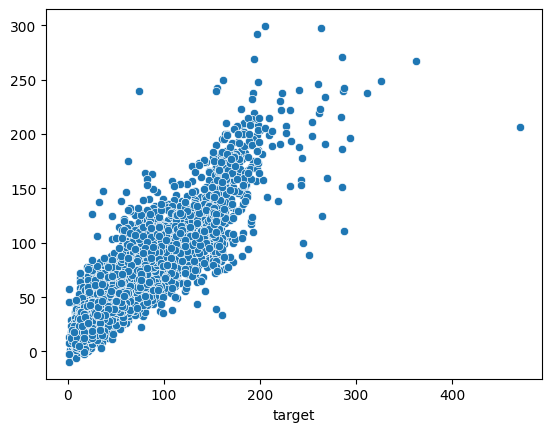

In [94]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)

sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(best_model, open("xgboost_with_place_dummies_all_features-03", 'wb'))

In [95]:
rs.best_params_

{'reg_lambda': 1.5,
 'n_estimators': 1100,
 'min_child_weight': 16,
 'max_depth': 7}

In [96]:
parameters = { "max_depth":[8,9,10],
               "min_child_weight":[16,17,18,19]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................max_depth=10, min_child_weight=19; total time= 1.6min
[CV] END ..................max_depth=10, min_child_weight=19; total time= 1.6min
[CV] END ..................max_depth=10, min_child_weight=19; total time= 1.6min
[CV] END ..................max_depth=10, min_child_weight=17; total time= 1.6min
[CV] END ..................max_depth=10, min_child_weight=19; total time= 1.6min
[CV] END ..................max_depth=10, min_child_weight=17; total time= 1.6min
[CV] END ..................max_depth=10, min_child_weight=19; total time= 1.7min
[CV] END ..................max_depth=10, min_child_weight=17; total time= 1.7min
[CV] END ...................max_depth=9, min_child_weight=16; total time= 1.4min
[CV] END ...................max_depth=9, min_child_weight=16; total time= 1.4min
[CV] END ...................max_depth=9, min_child_weight=16; total time= 1.4min
[CV] END ...................max_depth=9, min_chi

KeyboardInterrupt: 

23.17966799266872

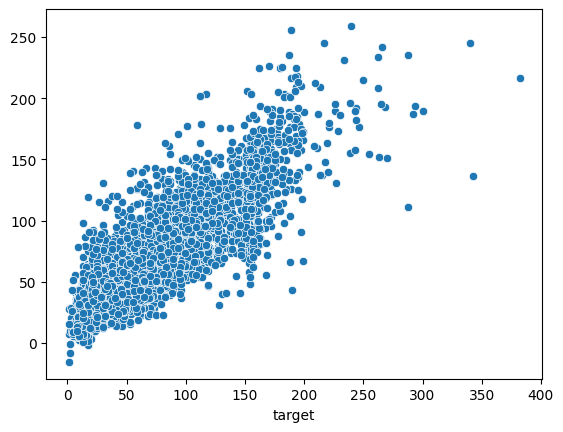

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)

sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
pickle.dump(best_model, open("xgboost_with_place_dummies_all_features-04", 'wb'))

In [ ]:
rs.best_params_

{'min_child_weight': 18, 'max_depth': 9}

In [119]:
validation=pd.read_csv("Data/Test.csv")

---
### without place id

In [120]:
X_val=[]
X_val=validation.drop(validation.loc[:,(validation.columns.str.contains("target"))],axis=1)
X_val=validation.drop(["Place_ID X Date","Place_ID"],axis=1)
X_val.Date=pd.to_datetime(X_val.Date,format="%Y-%m-%d")
X_val["day_delta"]=(X_val.Date-X_val.Date.min()).dt.days
X_val=X_val.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])
#X_val=X_val.drop(["Place_ID X Date","Place_ID"],axis=1)
X_val.shape


(16136, 75)

In [197]:
X=[]
y=[]


X=df.drop(df.loc[:,(df.columns.str.contains("target"))],axis=1)
X=X.drop(["Place_ID X Date","Place_ID"],axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])


y=df["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]

In [198]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2,random_state=rseed)

27.927048333048738

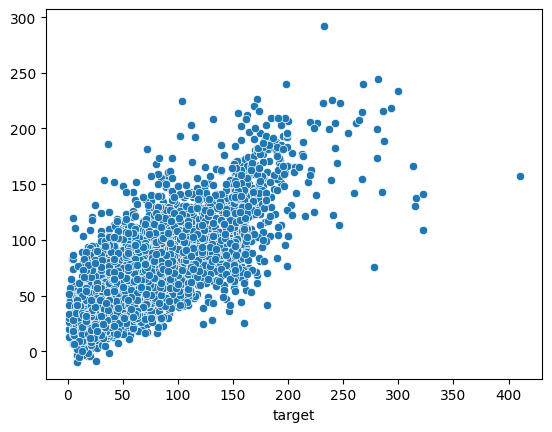

In [199]:
boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [200]:
pickle.dump(boost, open("xgboost_no_dum_all_features-01", 'wb'))

In [201]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,8,9,10,11],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [900,1000,1100],
              "reg_alpha"   : [0.5,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=900, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 1.9min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=900, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 2.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=900, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 2.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=900, objective=reg:squarederror, reg_alpha=1, reg_lambda=3; total time= 2.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=900, objective=reg:squa

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [2, 3], 'learning_rate': [0.1],
                                        'max_depth': [7, 8, 9, 10, 11],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [900, 1000, 1100],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=2)

25.332043363746074

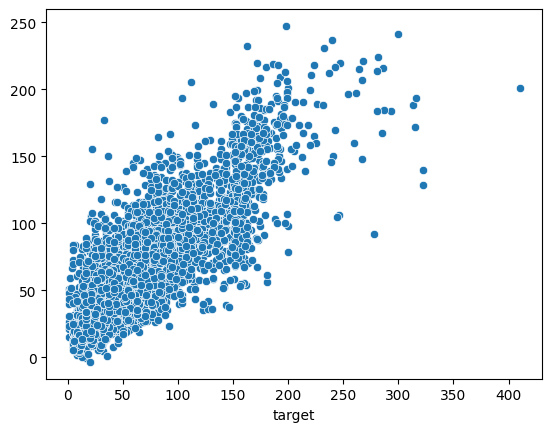

In [202]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [106]:
pickle.dump(best_model, open("xgboost_no_dum_all_features-02", 'wb'))

In [ ]:
rs.best_params_

{'reg_lambda': 5,
 'reg_alpha': 1,
 'objective': 'reg:squarederror',
 'n_estimators': 1000,
 'min_child_weight': 25,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [ ]:
best_for_now=best_model
best_for_now

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=25, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [107]:
parameters = {'max_depth': [9,10,11,],
              'min_child_weight': [24,25,26,27],
              'n_estimators': [1050,1100,1150],
              "reg_lambda"  : [4,5,6],
              "gamma"       : [1.5,2,2.5]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END gamma=2, max_depth=9, min_child_weight=24, n_estimators=1050, reg_lambda=4; total time= 1.6min
[CV] END gamma=2, max_depth=9, min_child_weight=24, n_estimators=1050, reg_lambda=4; total time= 1.6min
[CV] END gamma=2, max_depth=9, min_child_weight=24, n_estimators=1050, reg_lambda=4; total time= 1.6min
[CV] END gamma=2.5, max_depth=11, min_child_weight=27, n_estimators=1100, reg_lambda=5; total time= 1.6min
[CV] END gamma=2.5, max_depth=11, min_child_weight=27, n_estimators=1100, reg_lambda=5; total time= 1.7min
[CV] END gamma=2.5, max_depth=11, min_child_weight=27, n_estimators=1100, reg_lambda=5; total time= 1.7min
[CV] END gamma=2.5, max_depth=11, min_child_weight=27, n_estimators=1100, reg_lambda=5; total time= 1.8min
[CV] END gamma=2.5, max_depth=11, min_child_weight=27, n_estimators=1100, reg_lambda=5; total time= 1.8min
[CV] END gamma=2, max_depth=9, min_child_weight=24, n_estimators=1050, reg_lambda=4; total time= 1.7min
[CV] END gamma=2.5, max_depth=9, min_child_weight

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=2,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_delta_step=None, max_depth=9,
                                          max_leaves=None, min_child_weight=25,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [1.5, 2, 2.5],
                                        'max_depth': [9, 10, 11],
                                        'min_child_weight': [24, 25, 26, 27],
                                        'n_estimators': [1050, 1100, 1150],
                                        'reg_lambda': [4, 5, 6]},
                   verbose=2)

25.014986760228926

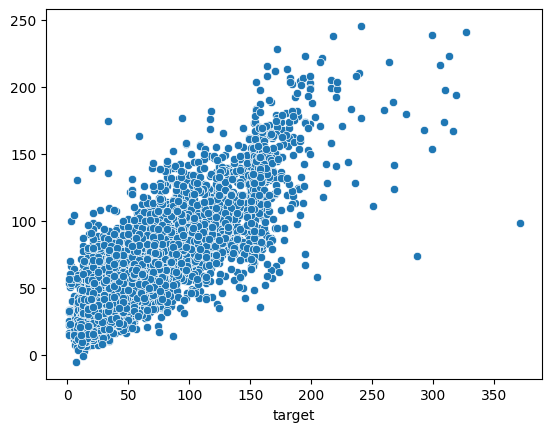

In [109]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [110]:
pickle.dump(best_model, open("xgboost_no_dum_all_features-03", 'wb'))

In [ ]:
best_for_now=best_model

In [111]:
rs.best_params_

{'reg_lambda': 5,
 'n_estimators': 1150,
 'min_child_weight': 25,
 'max_depth': 11,
 'gamma': 1.5}

In [112]:
parameters = {'max_depth': [7,8,9,10],
              'min_child_weight': [22,23,24,25],
              'n_estimators': [1150,1200],
}
rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_child_weight=22, n_estimators=1150; total time= 1.5min
[CV] END max_depth=8, min_child_weight=22, n_estimators=1150; total time= 1.6min
[CV] END max_depth=8, min_child_weight=22, n_estimators=1150; total time= 1.6min
[CV] END max_depth=10, min_child_weight=24, n_estimators=1150; total time= 1.8min
[CV] END max_depth=10, min_child_weight=24, n_estimators=1150; total time= 1.9min
[CV] END max_depth=10, min_child_weight=24, n_estimators=1150; total time= 1.9min
[CV] END max_depth=10, min_child_weight=24, n_estimators=1150; total time= 1.9min
[CV] END max_depth=10, min_child_weight=24, n_estimators=1150; total time= 2.0min
[CV] END max_depth=7, min_child_weight=24, n_estimators=1200; total time= 1.2min
[CV] END max_depth=7, min_child_weight=24, n_estimators=1200; total time= 1.2min
[CV] END max_depth=8, min_child_weight=22, n_estimators=1150; total time= 1.6min
[CV] END max_depth=8, min_child_weight=22, 

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=1.5,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=11,
                                          max_leaves=None, min_child_weight=25,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1150, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'min_child_weight': [22, 23, 24, 25],
                                        'n_estimators': [1150, 1200]},
                   verbose=2)

24.973444512312707

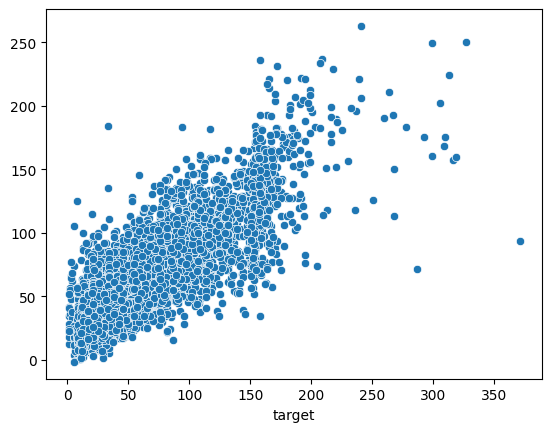

In [157]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [114]:
pickle.dump(best_model, open("xgboost_no_dum_all_features-finalmodel", 'wb'))

In [115]:
rs.best_params_

{'n_estimators': 1150, 'min_child_weight': 24, 'max_depth': 10}

In [116]:
best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'rmse',
 'feature_types': None,
 'feature_weights': None,
 'gamma': 1.5,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 24,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 1150,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [121]:
y_val_pred=best_model.predict(X_val)
y_val_pred
submit=pd.concat([validation["Place_ID X Date"],pd.Series(y_val_pred)],axis=1)

submit=submit.rename(columns={0:"target"})
submit
submit.to_csv("Data/Submission.csv",index=False)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


X=df_drop_angles.dropna()
X=X.drop(["Place_ID X Date","Place_ID"],axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])


y=df_no_na["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]



In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)

In [ ]:

sv=SVR()
sv.fit(X_train,y_train)

SVR()

47.735424275084654

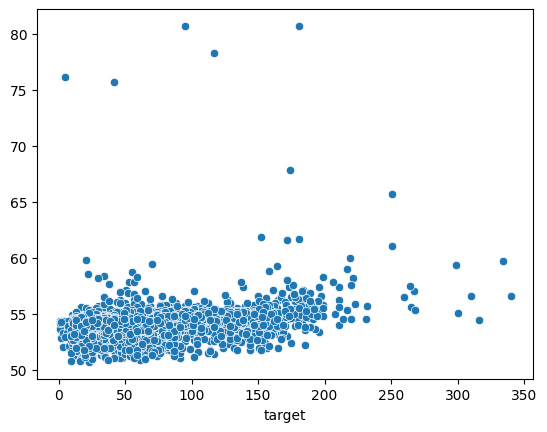

In [ ]:

y_pred=sv.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
param={"c":[0.7,0.8,0.9],
       "degree":[3,4,5,6,7],
       "epsilon":[0.1,0.07,0.13],
       "cache_size":[150,200,250,300],
       }

In [ ]:
sv_rs=RandomizedSearchCV(sv,param,n_jobs=-1,verbose=2)

In [ ]:
sv.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [123]:
from sklearn.inspection import PartialDependenceDisplay,permutation_importance

"""features=
PartialDependenceDisplay.from_estimator(best_for_now,X_train,X.columns,verobse=2)
plt.show()"""

'features=\nPartialDependenceDisplay.from_estimator(best_for_now,X_train,X.columns,verobse=2)\nplt.show()'

In [133]:
result = permutation_importance(best_model, X_test, y_test, n_repeats=10)

In [127]:
len(result["importances"])

75

Text(0.5, 1.0, 'Permutation Importance')

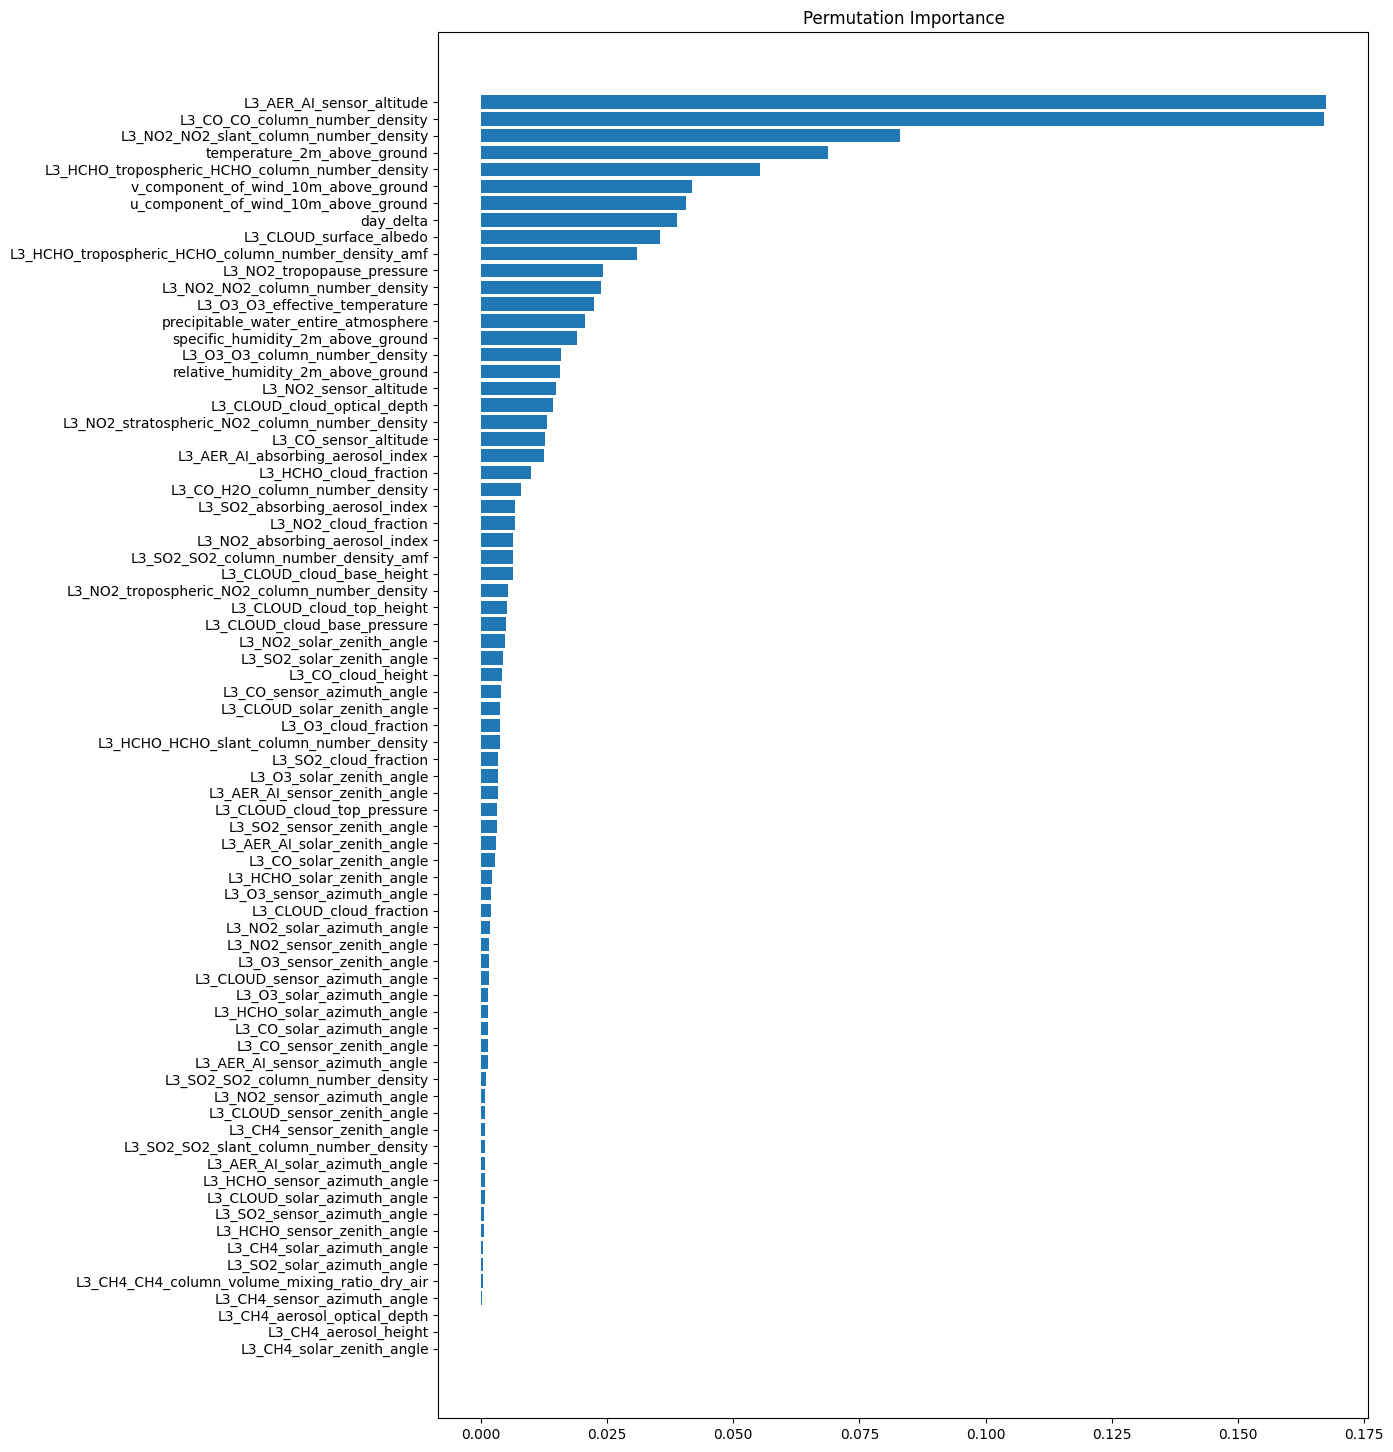

In [136]:


sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(12, 18))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')


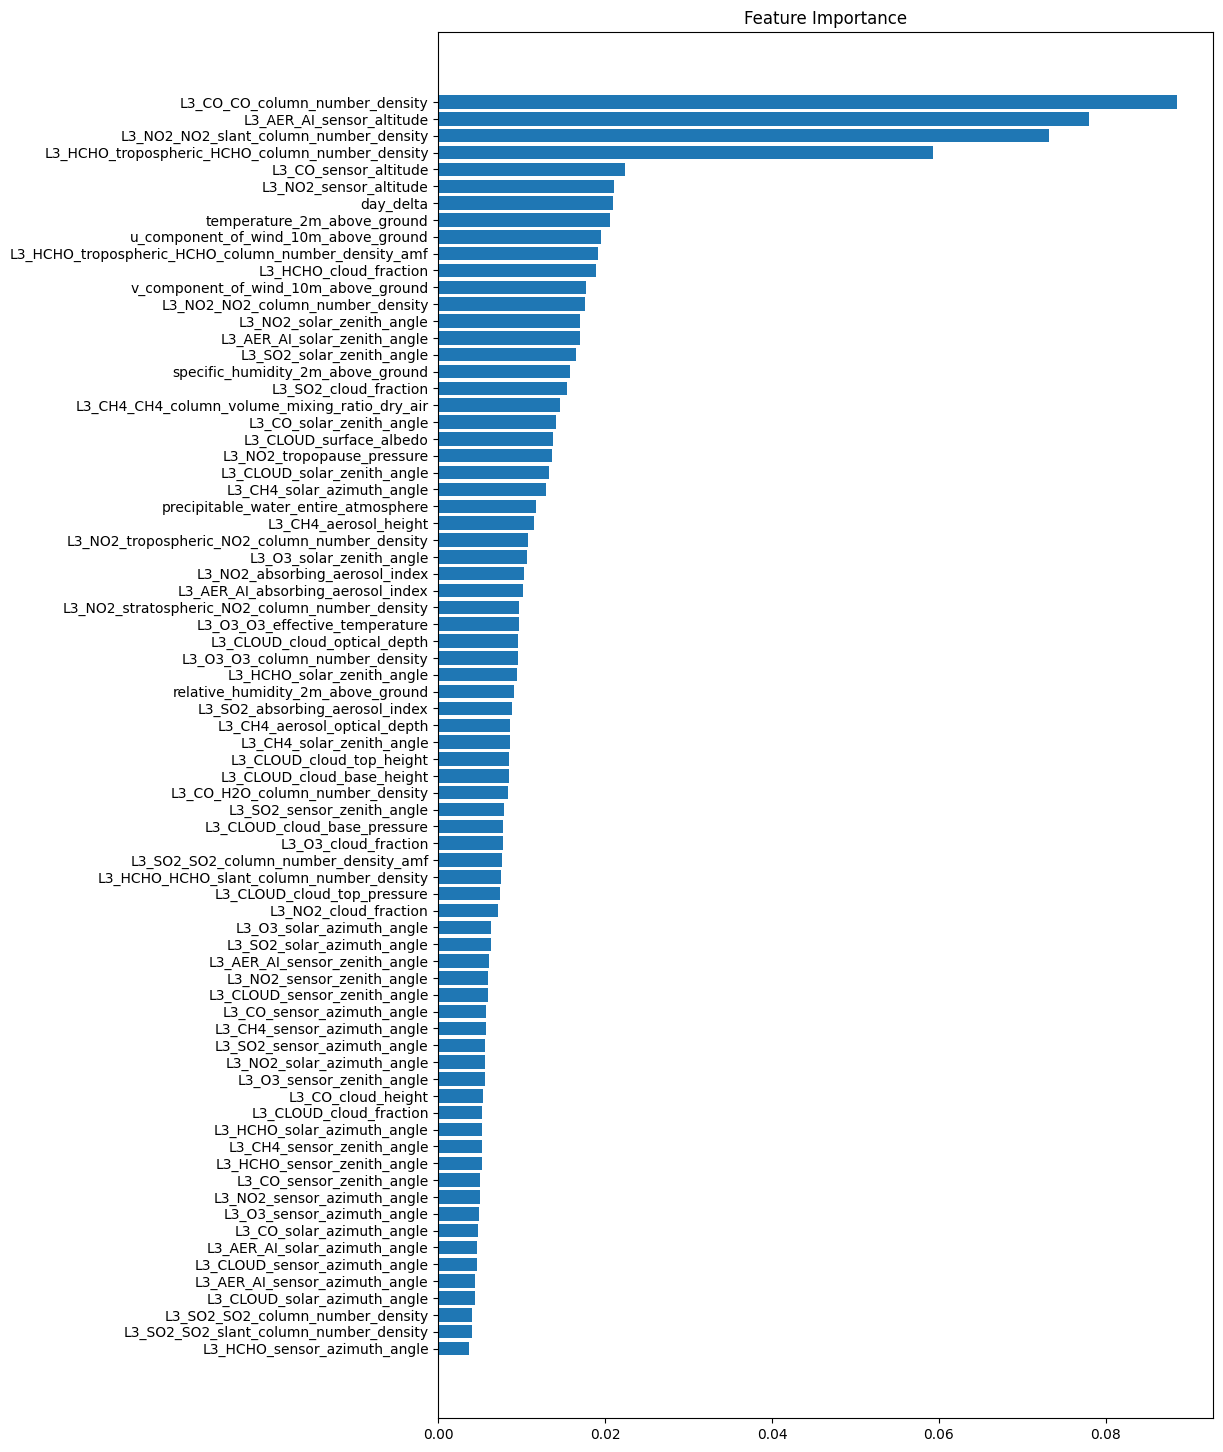

In [159]:

    feature_importance = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(10, 18))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

In [186]:
def result_plot(model,X_test,y_test):

    fig , ax = plt.subplots(figsize=(10, 10))

    y_pred=model.predict(X_test)
    sns.scatterplot(x=y_test,y=y_pred)
    rmse=sqrt(mean_squared_error(y_test,y_pred))

    ax.set_yticks(np.arange(0, 451,50))
    ax.set_xticks(np.arange(0, 451,50))
    
    textstr=f"RMSE : {round(rmse,4)}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    plt.ylabel("Prediction")


In [149]:
max(y_test)

371.0

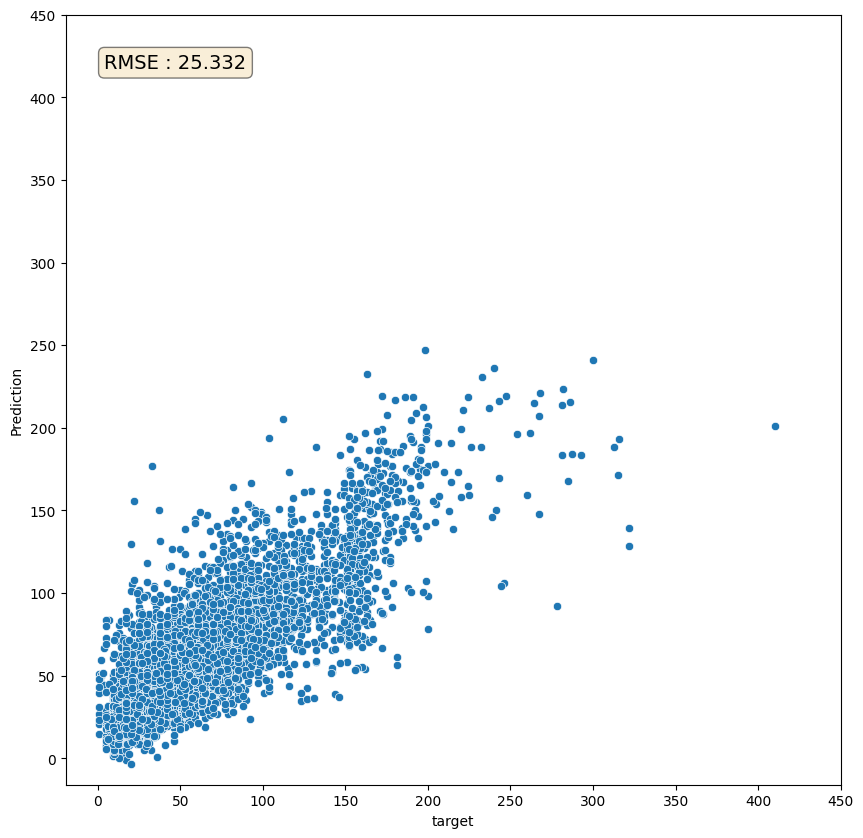

In [203]:
result_plot(best_model,X_test,y_test)

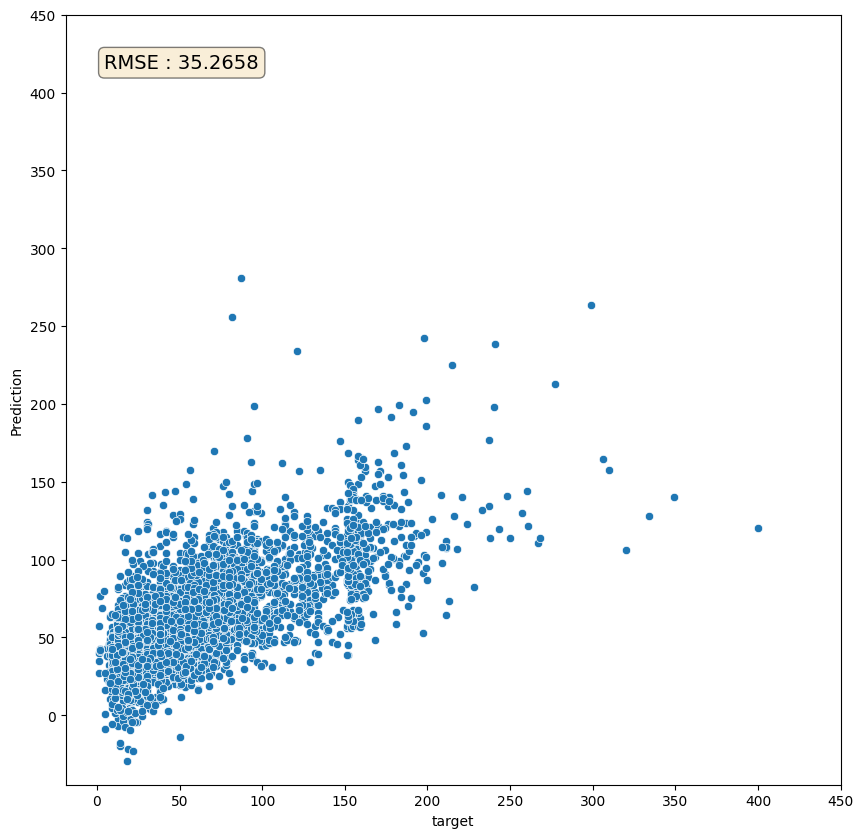

In [195]:
result_plot(linear_model_np,X_test_np,y_test_np)

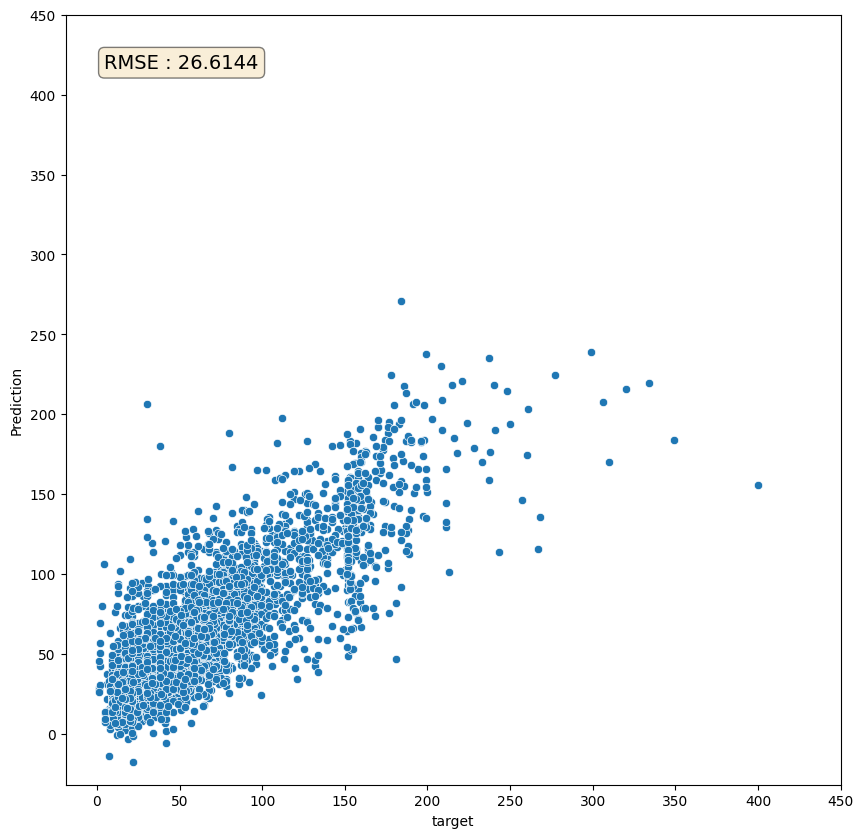

In [196]:
result_plot(boost_np,X_test_np,y_test_np)

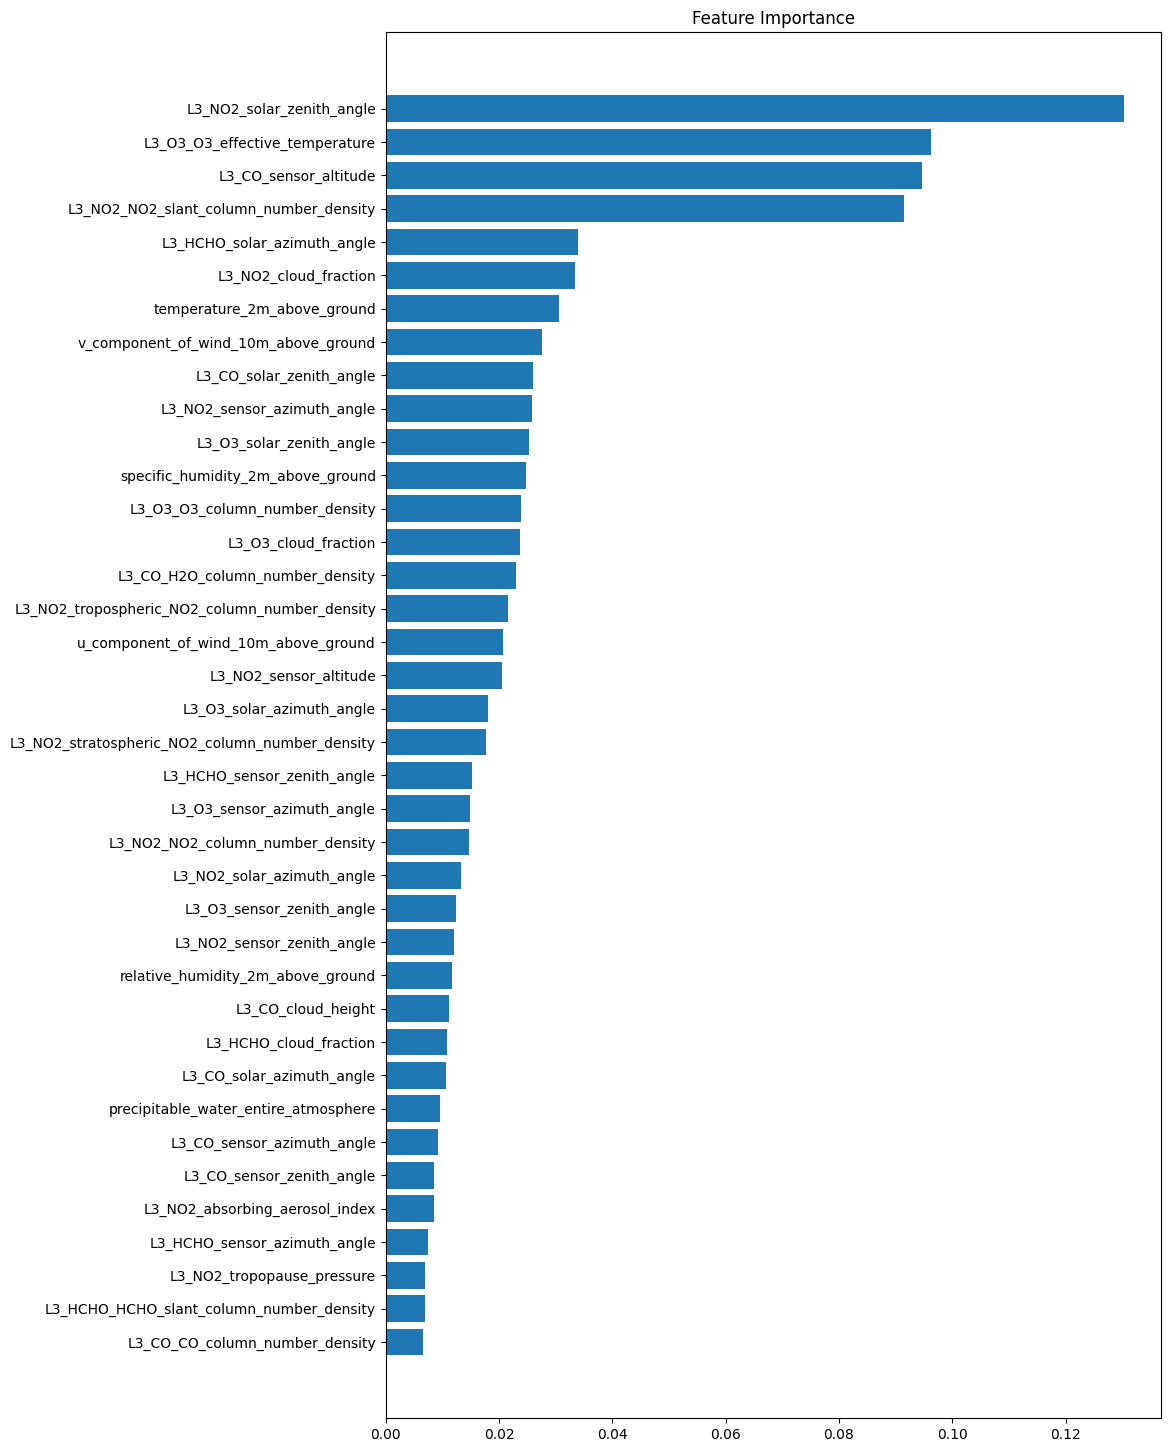

In [188]:
    feature_importance = boost_np.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(10, 18))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

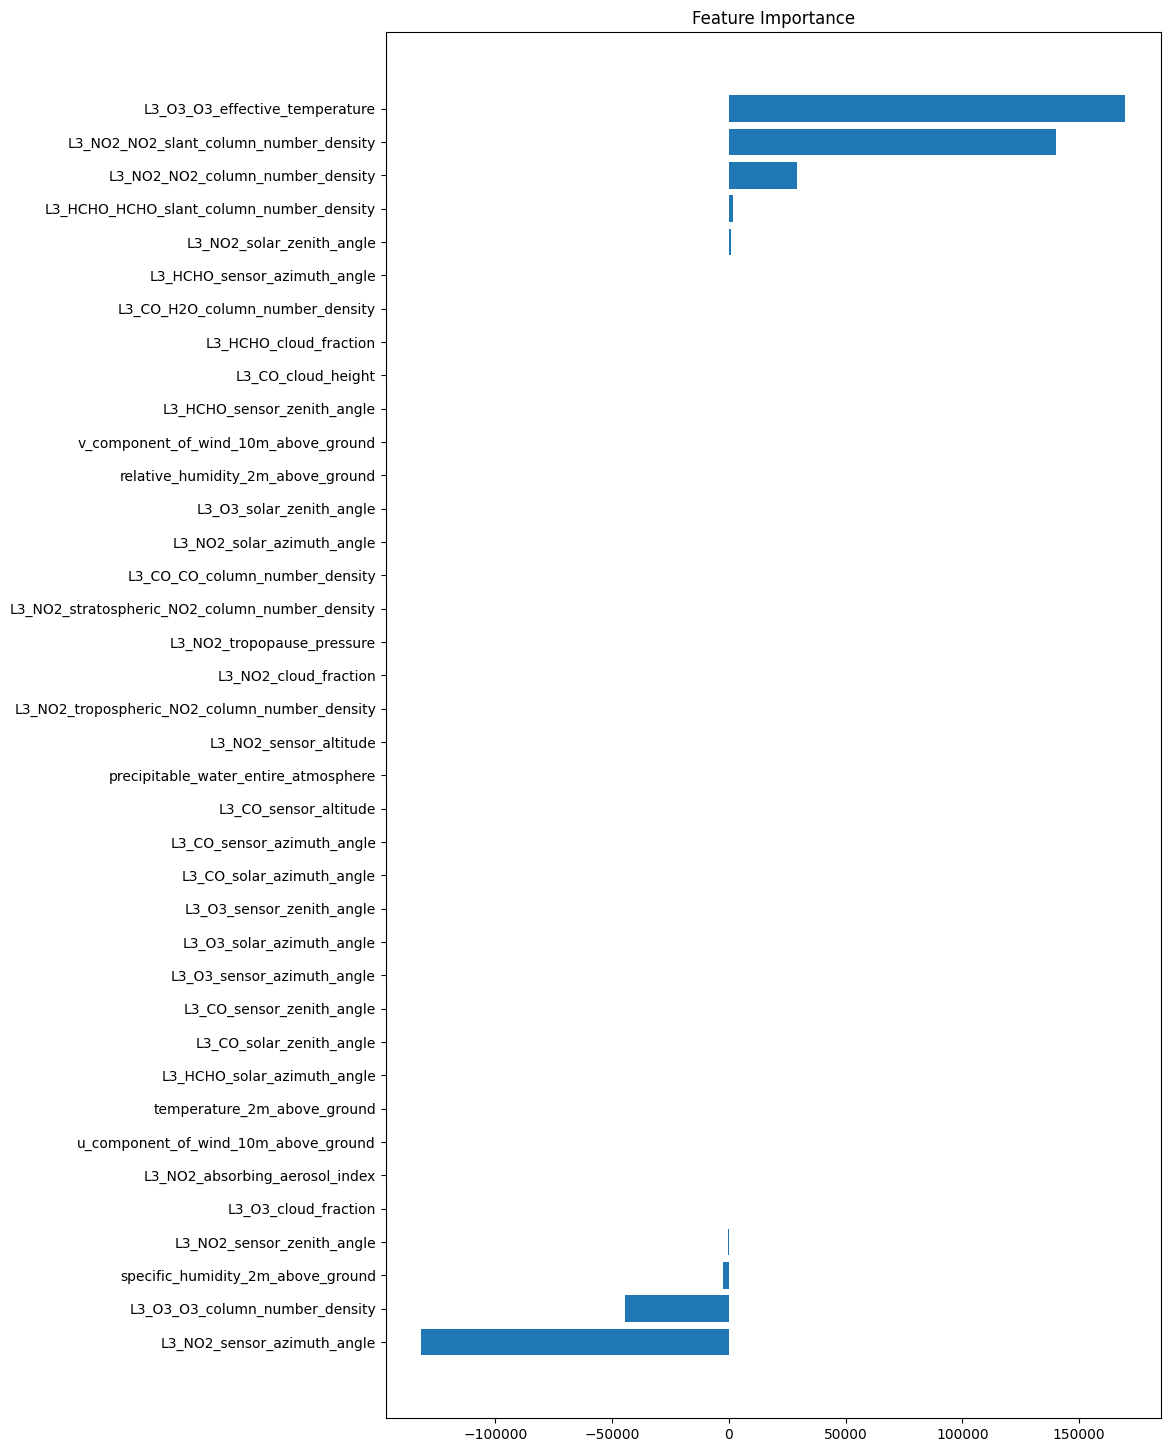

In [190]:
    feature_importance = linear_model_np.coef_
    sorted_idx = np.argsort(feature_importance)
    fig = plt.figure(figsize=(10, 18))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

In [129]:
sns.scatterplot(y=X.columns,x=result["importances"])

ValueError: Per-column arrays must each be 1-dimensional

svr

feature analysez

the other plot for regerssion analytics

replacing 0 values with other things
